In [ ]:

import math
import os
import random
import sys

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm import tqdm

In [ ]:
def f(x):
    return x**3 - x**2 - 2*x + 5

x = torch.tensor(10 * torch.rand(1).item(), requires_grad= True)

lr, max_iter, tol = 0.01, 1000, 1e-5
x_hist = []
f_hist = []

for i in range(max_iter):

    loss = f(x)
    f_hist.append(loss.item())
    x_hist.append(x.item())

    loss.backward()

    with torch.no_grad():
        x -= lr * x.grad

        if  abs(lr * x.grad) < tol:
            break

        x.grad.zero_()

    # if i % 10 == 0:
    #     print(f"Iter {i}: x = {x.item()}, f(x) = {f(x).item()}")

# Results
print(f"Minimum found at x = {x.item()}, f(x) = {f(x).item()}")

Minimum found at x = 1.215423583984375, f(x) = 2.887388229370117


In [ ]:
!pip install -q kaggle

In [ ]:
!ls

anscombe.json		     california_housing_train.csv  kaggle.json	   mnist_train_small.csv
california_housing_test.csv  data.txt			   mnist_test.csv  README.md


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 109MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("spaceship-titanic.zip", "r") as zip_ref:
    zip_ref.extractall("spaceship-titanic")

In [ ]:
!ls

anscombe.json		      data.txt	      mnist_train_small.csv  spaceship-titanic.zip
california_housing_test.csv   kaggle.json     README.md
california_housing_train.csv  mnist_test.csv  spaceship-titanic


In [ ]:
test, train = pd.read_csv("test.csv"), pd.read_csv("train.csv")

In [ ]:
train

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [ ]:
train = train.drop(columns=['PassengerId'])

In [ ]:
train = train.apply(lambda col: col.fillna(col.mode()[0]))

In [ ]:
y = train['Transported']
#train = train.drop(columns=['PassengerId','Transported'])

In [ ]:
cat = train.select_dtypes(include = 'object').columns
num = train.select_dtypes(exclude = 'object').columns

In [ ]:
cat

Index(['HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')

In [ ]:
cor = train[num].corrwith(y).sort_values(ascending=False)

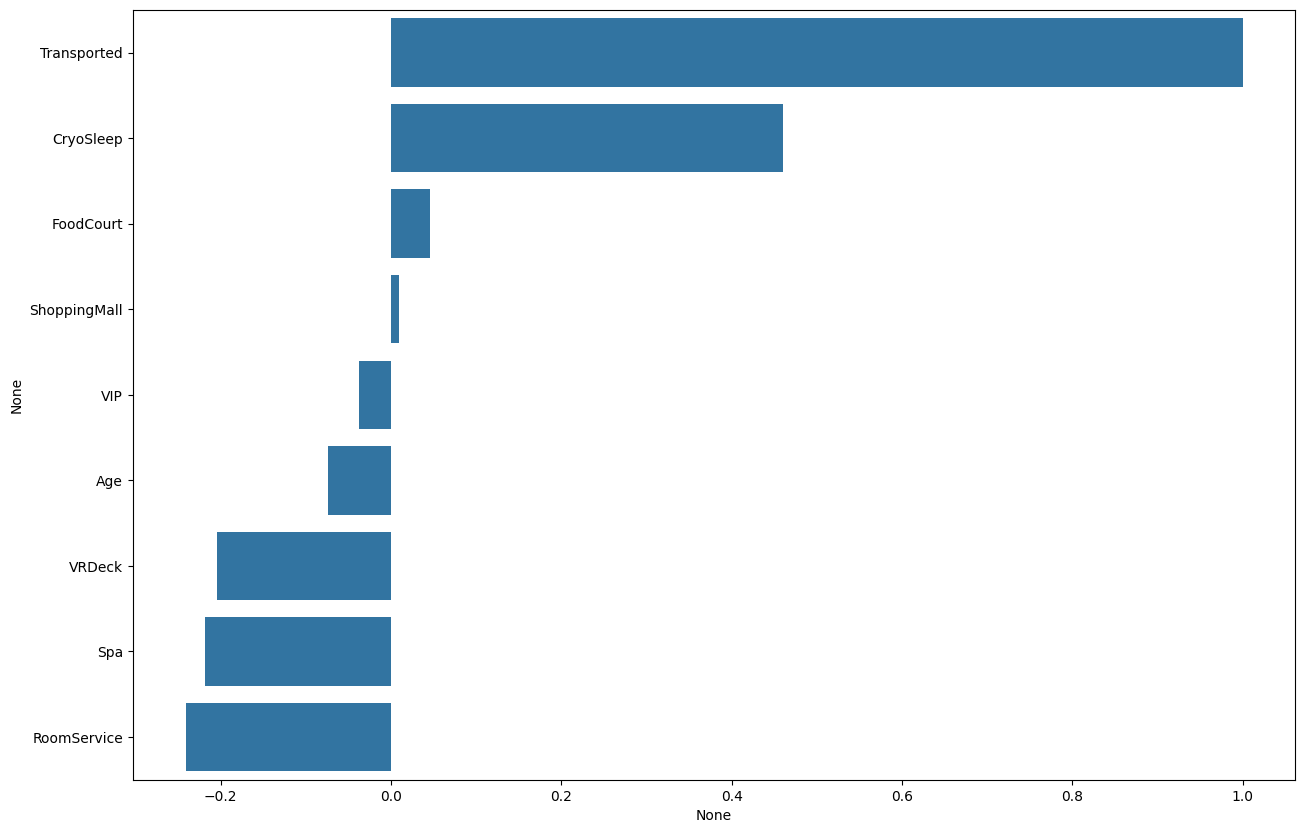

In [ ]:
plot = sns.barplot(y=cor.index, x =cor)
plot.figure.set_size_inches(15, 10)

In [ ]:
train

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8693 rows x 14 columns]

In [ ]:
train.drop(columns=['VIP', 'VRDeck','Spa','RoomService'])

HomePlanet  CryoSleep     Cabin    Destination   Age  FoodCourt  \
0        Europa      False     B/0/P    TRAPPIST-1e  39.0        0.0   
1         Earth      False     F/0/S    TRAPPIST-1e  24.0        9.0   
2        Europa      False     A/0/S    TRAPPIST-1e  58.0     3576.0   
3        Europa      False     A/0/S    TRAPPIST-1e  33.0     1283.0   
4         Earth      False     F/1/S    TRAPPIST-1e  16.0       70.0   
...         ...        ...       ...            ...   ...        ...   
8688     Europa      False    A/98/P    55 Cancri e  41.0     6819.0   
8689      Earth       True  G/1499/S  PSO J318.5-22  18.0        0.0   
8690      Earth      False  G/1500/S    TRAPPIST-1e  26.0        0.0   
8691     Europa      False   E/608/S    55 Cancri e  32.0     1049.0   
8692     Europa      False   E/608/S    TRAPPIST-1e  44.0     4688.0   

      ShoppingMall               Name  Transported  
0              0.0    Maham Ofracculy        False  
1             25.0       Juanna Vines         True  
2              0.0      Altark Susent        False  
3            371.0       Solam Susent        False  
4            151.0  Willy Santantines         True  
...            ...                ...          ...  
8688           0.0  Gravior Noxnuther        False  
8689           0.0    Kurta Mondalley        False  
8690        1872.0       Fayey Connon         True  
8691           0.0   Celeon Hontichre        False  
8692           0.0   Propsh Hontichre         True  

[8693 rows x 9 columns]

Как видно лучше всего коррлируют с целевой переменной признаки такие как: FoudCort, Cryosleep, shappingMall
Остальные, что плохо коррлеируют можно удалитьб дабы получить модель качественную

In [ ]:
train[cat].nunique()

HomePlanet        3
Cabin          6560
Destination       3
Name           8473
dtype: int64

<Axes: xlabel='HomePlanet', ylabel='Count'>

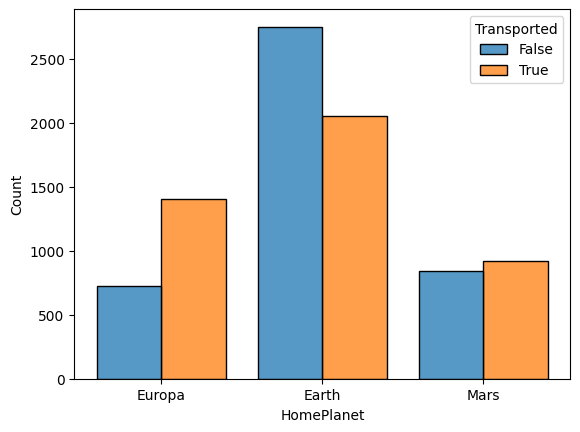

In [ ]:
sns.histplot(x=train['HomePlanet'], hue=train['Transported'], multiple="dodge", shrink=.8 )

Как видно больше удельно было траспортированно с Европы планеты, меньше всего с Земли и удельно приблезительно равномерно распредлены доли транспортируемых с Марса

<Axes: xlabel='Destination', ylabel='Count'>

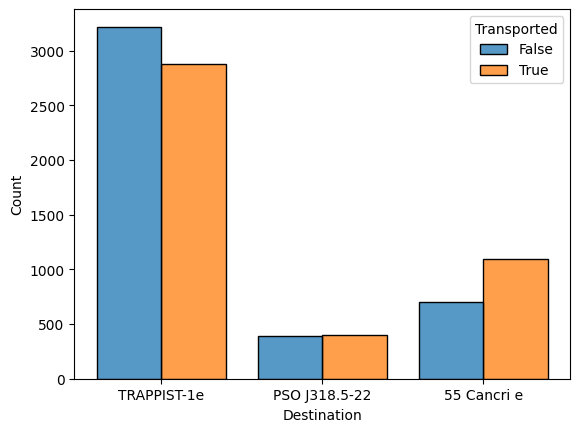

In [ ]:
sns.histplot(x=train['Destination'], hue=train['Transported'], multiple="dodge", shrink=.8 )

Из этого распредления можно сказать, что относительно чаще люди были траспортированы на 55 Cancri e, меньше на TRAPPIST-1-e, а на PSO j318.5-22 было равномерно

Проанализируем то сколько людей было досталвно с траспортирвоки планет ына планету

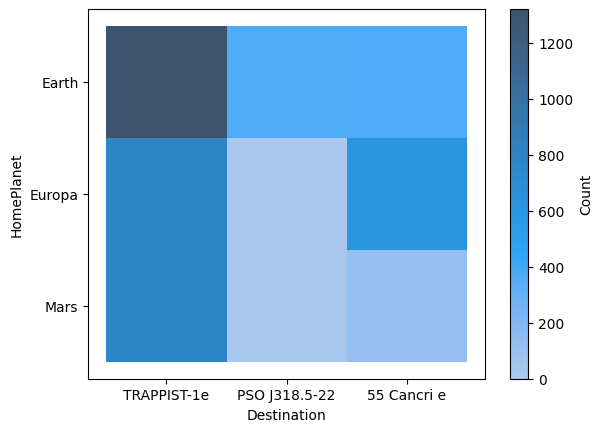

In [ ]:
plot = sns.histplot( x=train[train['Transported']==True]['Destination'], y=train[train['Transported']==True]['HomePlanet'])
plt.colorbar(plot.collections[0], label='Count')
plt.show()

Из данной гистгораммы видно как распределено количество людей транспортированных с одних планет на другие
Больше всего было трапортировано с Земли на TRRPPIST-1e, меньше всего с Европы/Марса на PSO j318.5-22

In [ ]:
plot = sns.histplot( x=train[train['Transported']==True]['Destination'], y=train[train['Transported']==True]['HomePlanet'])
plt.colorbar(plot.collections[0], label='Count')
plt.show()

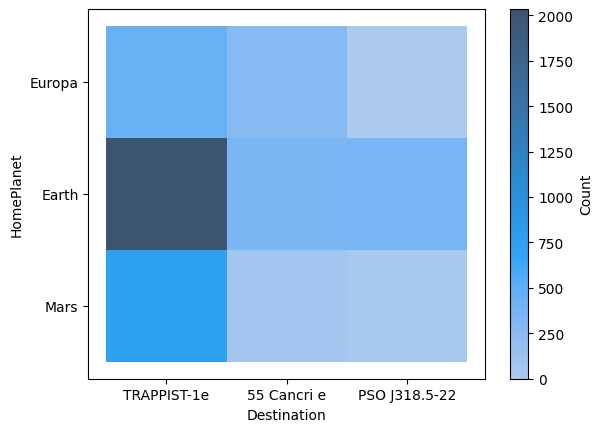

In [ ]:
plot = sns.histplot( x=train[train['Transported']==False]['Destination'], y=train[train['Transported']==False]['HomePlanet'])
plt.colorbar(plot.collections[0], label='Count')
plt.show()

Здесь уже видно что хуже всего были транспортированы с Земли на TRAPPIST-1e
Абсолютный максимум в данной выборке

<Axes: xlabel='CryoSleep', ylabel='Count'>

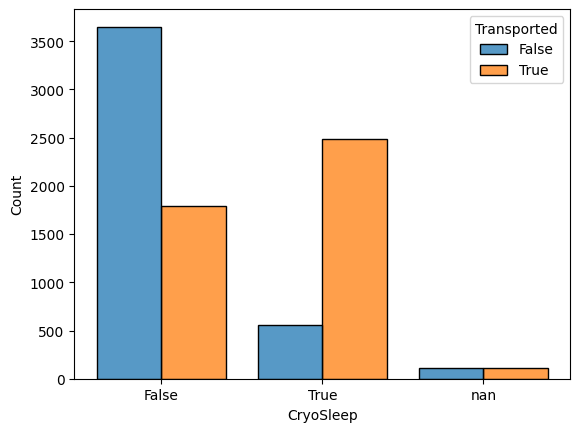

In [ ]:
sns.histplot(x=train['CryoSleep'], hue=train['Transported'], multiple="dodge", shrink=.8 )

<Axes: xlabel='Cabin', ylabel='Count'>

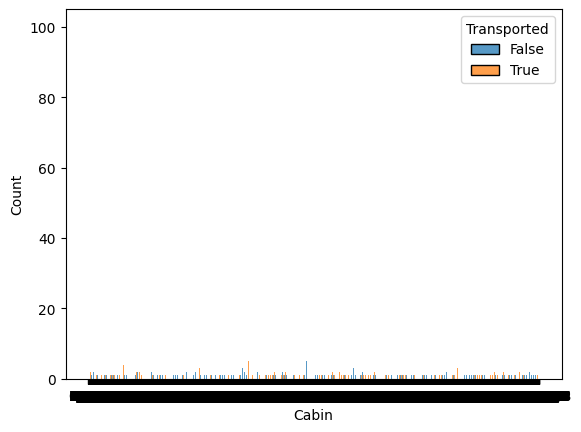

In [ ]:
sns.histplot(x=train['Cabin'], hue=train['Transported'], multiple="dodge", shrink=.8 )

<Axes: xlabel='VIP', ylabel='Count'>

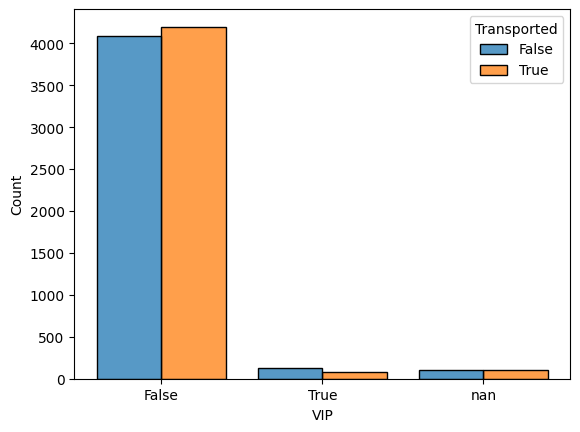

In [ ]:
sns.histplot(x=train['VIP'], hue=train['Transported'], multiple="dodge", shrink=.8 )

<Axes: xlabel='CryoSleep', ylabel='Count'>

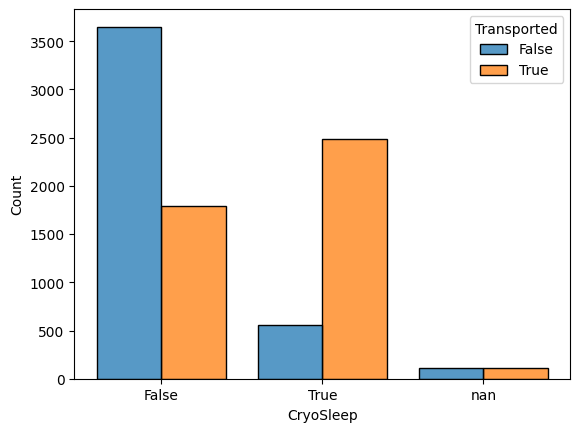

In [ ]:
sns.histplot(x=train['CryoSleep'], hue=train['Transported'], multiple="dodge", shrink=.8 )

In [ ]:
len(train['Destination'])

8693

<Axes: xlabel='Destination', ylabel='Count'>

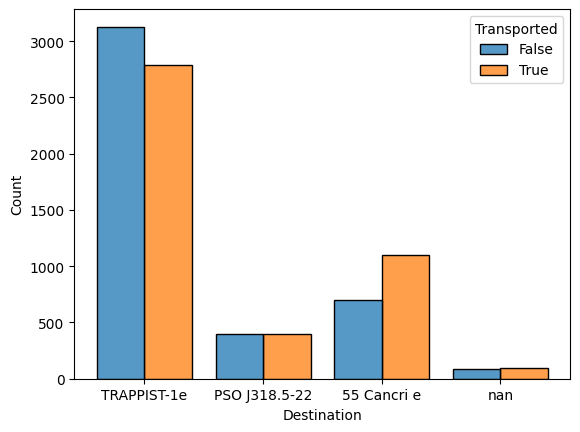

In [ ]:
sns.histplot(x=train['Destination'], hue=train['Transported'], multiple="dodge", shrink=.8 )

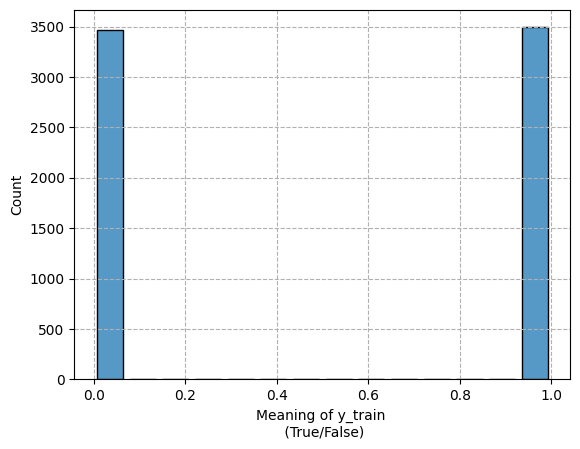

In [ ]:
sns.histplot(x=y_train, multiple="dodge", shrink=.8 )
plt.xlabel('Meaning of y_train \n (True/False)')
plt.grid(True, linestyle='--')

Как видно нет сильного отклоения какого либо значения ключевого признака, значит будем обучать модели на кросс валидации с отслеживанием переобучения на log_loss функции и на RandomTreeDecision, после проверки на  количестве базовых (n_estimates) моделей будем подбирать оптимальные остальные данные  

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold

In [ ]:
%cd spaceship-titanic
test = pd.read_csv("test.csv")
train = pd.read_csv('train.csv')

/content/sample_data/spaceship-titanic


In [ ]:
test = test.apply(lambda col: col.fillna(col.mode()[0]))

<ipython-input-140-d609761dfe9d>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.apply(lambda col: col.fillna(col.mode()[0]))


In [ ]:
y_train = train['Transported']

train, test = train.drop(columns=['PassengerId','VIP', 'Age', 'VRDeck', 'Spa', 'RoomService', 'Transported']), test.drop(columns=['PassengerId','VIP', 'Age', 'VRDeck', 'Spa', 'RoomService'])

Обучим модель Рандомного дерева и найдем оптимальное количество деревьев
Будем смотреть метрики точности на train и test

In [ ]:
cat = train.select_dtypes(include = ['object','boolean']).columns
num = train.select_dtypes(exclude = ['object','boolean']).columns

In [ ]:
train[cat] = train[cat].map(str)
test[cat_test]  = test[cat_test].map(str)
train[cat]

PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name Transported  
0       Maham Ofracculy       False  
1          Juanna Vines        True  
2         Altark Susent       False  
3          Solam Susent       False  
4     Willy Santantines        True  
...                 ...         ...  
8688  Gravior Noxnuther       False  
8689    Kurta Mondalley       False  
8690       Fayey Connon        True  
8691   Celeon Hontichre       False  
8692   Propsh Hontichre        True  

[8693 rows x 8 columns]

In [ ]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Сохраняем частоты категорий для каждой колонны
        self.freq_maps_ = {}
        # Проходим по всем колонкам и кодируем по частоте встречаемости
        for col_idx in range(X.shape[1]):  # Перебираем все колонки
            # Проверяем, если тип данных колонны категориальный (если строки)
            if isinstance(X[0, col_idx], str):
                # Считаем частоту категорий и сохраняем
                freq_map = dict(zip(*np.unique(X[:, col_idx], return_counts=True)))
                total = len(X[:, col_idx])
                freq_map = {k: v / total for k, v in freq_map.items()}  # Частоты категорий
                self.freq_maps_[col_idx] = freq_map
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col_idx in range(X.shape[1]):
            if col_idx in self.freq_maps_:  # Применяем только к категориальным данным
                X_copy[:, col_idx] = np.vectorize(self.freq_maps_[col_idx].get)(X[:, col_idx])
        return X_copy

train_log_means = []
val_log_means = []

for i in range(10, 3000, 50):
  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler',StandardScaler())
  ])
  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
      ('onehot', FrequencyEncoder())
  ])
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, num),
          ('cat', categorical_transformer, cat)
      ]
  )
  model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', RandomForestClassifier(n_estimators=i,
                                          max_depth=10,
                                          min_samples_split = 5,
                                          min_samples_leaf = 6,
                                          max_features='sqrt',
                                          random_state=42))
  ])

  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  train_scores_log = []
  val_scores_log = []

  for train_index, val_index in kf.split(train):
        X_train, X_val = train.iloc[train_index], train.iloc[val_index]
        y_train, y_val = y_new[train_index], y_new[val_index]

        model.fit(X_train, y_train)

        # Оценка на обучающих данных
        y_train_pred = model.predict_proba(X_train)[:,1]
        train_log_loss = log_loss(y_train, y_train_pred)
        train_scores.append(train_log_loss)

        # Оценка на валидационных данных
        y_val_pred = model.predict_proba(X_val)[:,1]
        val_log_loss = log_loss(y_val, y_val_pred)
        val_scores.append(val_log_loss)

    # Печать результатов для текущего значения n_estimators
  print(f"i: {i}, Log_loss Mean Train: {np.mean(train_scores)}, Log_loss Mean Valid: {np.mean(val_scores)}")
  train_log_means.append(np.mean(train_scores))
  val_log_means.append(np.mean(val_scores))

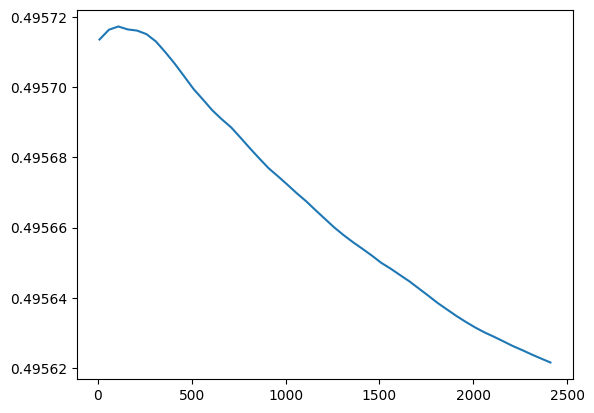

In [ ]:
plt.plot(range(10,2420,50), val_log_means)

In [ ]:
from itertools import product

Сделаем большой отбор данных с кол-вом деревьев в RandomForest 300 и переберем максимальную глубину (max_depth), минимальное кол-во образцов для листа (min_samples_leaf) и мин кол-во образцов дял разбияния узла (min_samples_split) в диапазоне от 2 до 50 с шагом 2
После этого построю графики зависимостей для данной данной большой выборки на основании которых можно будет сделать опредленные выводы для RandomTree на данном датасете

In [ ]:
train_log_means = []
val_log_means = []

for i, j, k in product(range(2, 50, 2), range(2, 50, 2), range(2, 50, 2)):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', FrequencyEncoder())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num),
            ('cat', categorical_transformer, cat)
        ]
    )
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestClassifier(n_estimators=300,
                                            max_depth=i,
                                            min_samples_split = j,
                                            min_samples_leaf = k,
                                            max_features='sqrt',
                                            random_state=42))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    train_scores_log = []
    val_scores_log = []

    for train_index, val_index in kf.split(train):
          X_train, X_val = train.iloc[train_index], train.iloc[val_index]
          y_train, y_val = y_new[train_index], y_new[val_index]

          model.fit(X_train, y_train)

          # Оценка на обучающих данных
          y_train_pred = model.predict_proba(X_train)[:,1]
          train_log_loss = log_loss(y_train, y_train_pred)
          train_scores.append(train_log_loss)

          # Оценка на валидационных данных
          y_val_pred = model.predict_proba(X_val)[:,1]
          val_log_loss = log_loss(y_val, y_val_pred)
          val_scores.append(val_log_loss)

      # Печать результатов для текущего значения n_estimators
    print(f"max_depth: {i}, min_samples_split: {j}, min_samples_leaf: {k}, , Log_loss Mean Train: {np.mean(train_scores)}, Log_loss Mean Valid: {np.mean(val_scores)}")
    train_log_means.append(np.mean(train_scores))
    val_log_means.append(np.mean(val_scores))

Код прервался по среди ночи конвертируем в текстовые данные и извлечем как из отдельного файла

In [ ]:
%cd sample_data

/content/sample_data


In [ ]:
with open("data.txt", "r", encoding="utf-8") as file:
  lines = file.read()

In [ ]:
import re

In [ ]:
lines
pattern = r"Log_loss Mean Train:\s*([\d.]+)"
marches = re.findall(pattern, lines)
Mean_train = [float(num.strip("'")) for num in marches]
Mean_train

In [ ]:
pattern = r"Log_loss Mean Valid:\s*([\d.]+)"
marches = re.findall(pattern, lines)
Mean_valid = [float(num.strip("'")) for num in marches]
Mean_valid

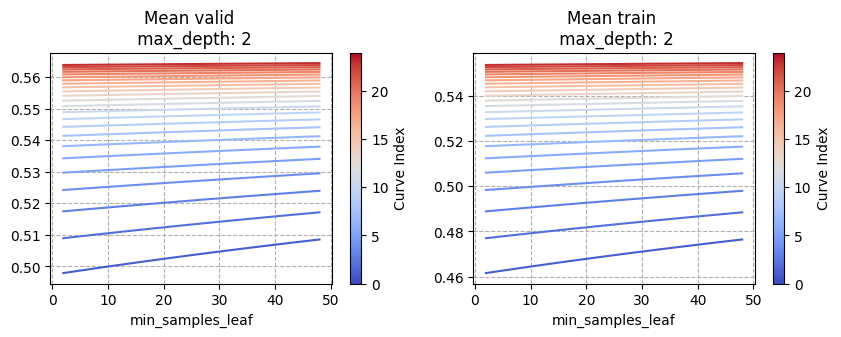

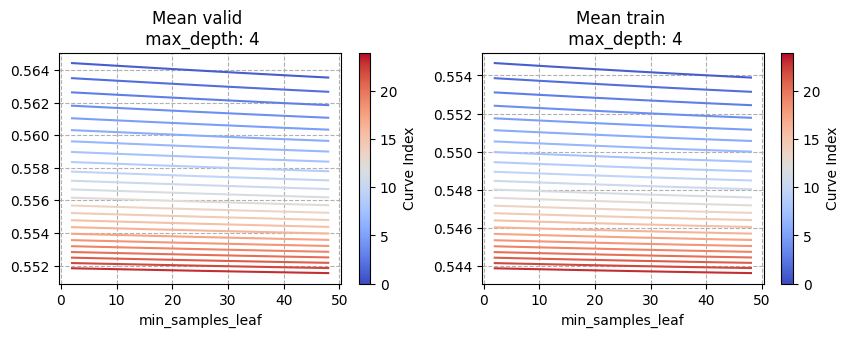

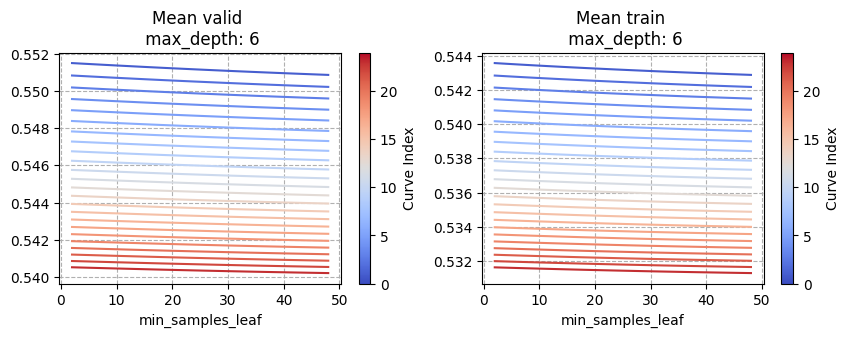

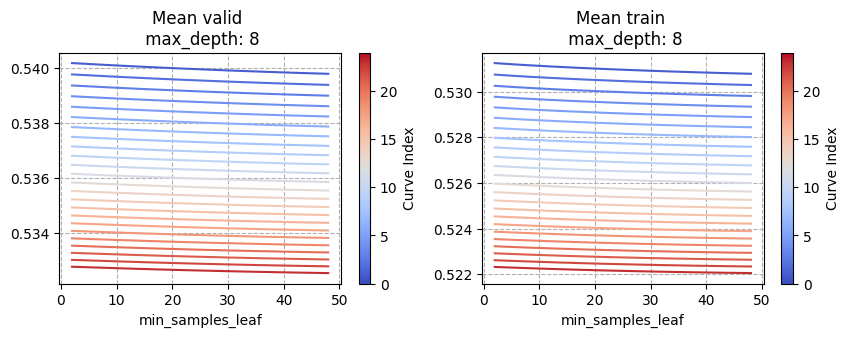

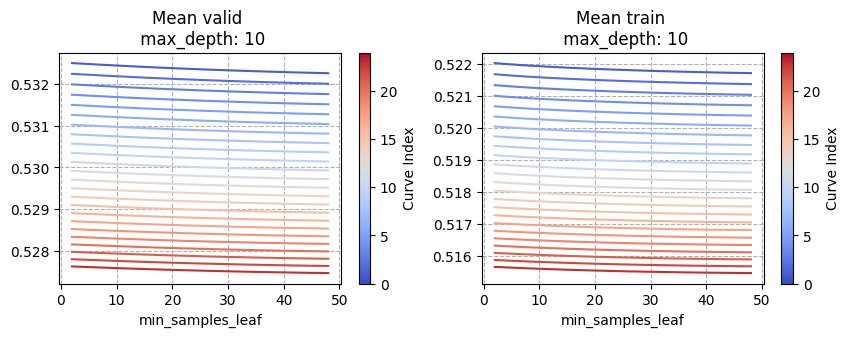

In [ ]:
name = range(2, 12, 2)
pallate = sns.color_palette("coolwarm", 24)
for i in range(1, 6):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    reshaped_valid = np.array(Mean_valid[(i-1)*24**2 : i*24**2]).reshape(24, -1)
    sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=24))

    for j in range(reshaped_valid.shape[0]):
        ax[0].plot(range(2, 50, 2), reshaped_valid[j], color=pallate[j])
    ax[0].grid(True, linestyle='--')
    ax[0].set_xlabel('min_samples_leaf')
    ax[0].set_title(f'Mean valid \n max_depth: {name[i-1]}')
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
    cbar.set_label("Curve Index")

    reshaped_train = np.array(Mean_train[(i-1)*24**2 : i*24**2]).reshape(24, -1)
    for j in range(reshaped_train.shape[0]):  # Итерации строк
        ax[1].plot(range(2, 50, 2), reshaped_train[j], color=pallate[j])  # Разные цвета
    ax[1].grid(True, linestyle='--')
    ax[1].set_xlabel('min_samples_leaf')
    ax[1].set_title(f'Mean train \n max_depth: {name[i-1]}')
    sm.set_array([])  # Пустая инициализация
    cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
    cbar.set_label("Curve Index")

    plt.show()

Возьмем глубину максимальную дерева 10 (max_depth), так как наименьший разброс между значениям логистической регресии взаивисомсти от минимального, к тому же видно что на валидации и на обучении падает значение логистической регресии в зависимости от минимального кол-во образцов дял разбияния узла (min_samples_leaf), что означает приближение к истинным меткам и модель становится более точной

Рассмотрим детально что происходит на количестве деревьев 300 и глубине 10  в зависимости от минимального кол-во образцов для разбиения узла в диапзоне от 2 до 50 с шагом 2
В частности метрики F1, accuracy, logg_loss на валидцаии и обучении с целью остлеживания более детального переобучения, после этого построим roc и pr кривую для науилучшего значения параметров Случайного дерева

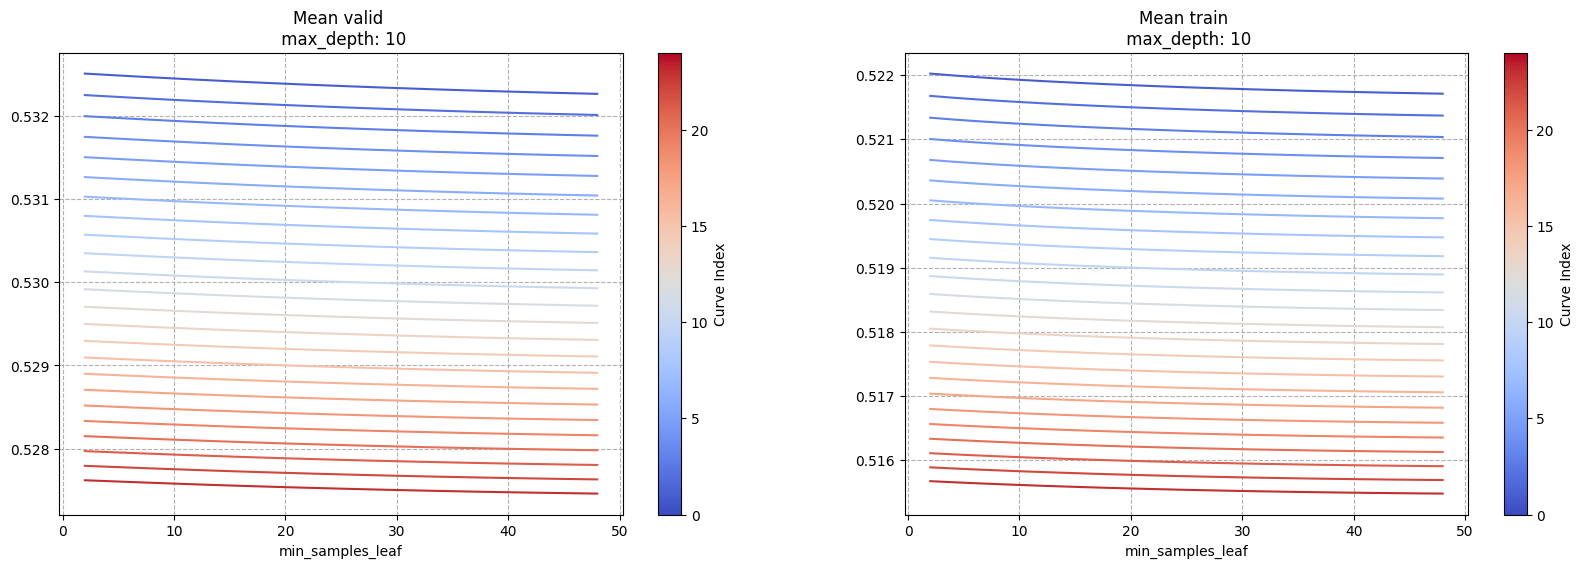

In [ ]:
name = range(2, 12, 2)
pallate = sns.color_palette("coolwarm", 24)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

reshaped_valid = np.array(Mean_valid[4*24**2 : 5*24**2]).reshape(24, -1)
sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=24))

for j in range(reshaped_valid.shape[0]):
    ax[0].plot(range(2, 50, 2), reshaped_valid[j], color=pallate[j])
ax[0].grid(True, linestyle='--')
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_title(f'Mean valid \n max_depth: {name[4]}')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
cbar.set_label("Curve Index")

reshaped_train = np.array(Mean_train[4*24**2 : 5*24**2]).reshape(24, -1)
for j in range(reshaped_train.shape[0]):  # Итерации строк
    ax[1].plot(range(2, 50, 2), reshaped_train[j], color=pallate[j])  # Разные цвета
ax[1].grid(True, linestyle='--')
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_title(f'Mean train \n max_depth: {name[4]}')
sm.set_array([])  # Пустая инициализация
cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
cbar.set_label("Curve Index")

plt.show()

Стоит отдельно ислледовать допольнительные вышеперечисленные метрики для данной модели

In [ ]:
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Сохраняем частоты категорий для каждой колонны
        self.freq_maps_ = {}
        # Проходим по всем колонкам и кодируем по частоте встречаемости
        for col_idx in range(X.shape[1]):  # Перебираем все колонки
            # Проверяем, если тип данных колонны категориальный (если строки)
            if isinstance(X[0, col_idx], str):
                # Считаем частоту категорий и сохраняем
                freq_map = dict(zip(*np.unique(X[:, col_idx], return_counts=True)))
                total = len(X[:, col_idx])
                freq_map = {k: v / total for k, v in freq_map.items()}  # Частоты категорий
                self.freq_maps_[col_idx] = freq_map
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col_idx in range(X.shape[1]):
            if col_idx in self.freq_maps_:  # Применяем только к категориальным данным
                X_copy[:, col_idx] = np.vectorize(self.freq_maps_[col_idx].get)(X[:, col_idx])
        return X_copy


In [ ]:
train_log_means = []
val_log_means = []

train_acc_means = []
val_acc_means = []

train_f1_mean = []
val_f1_mean = []

for j, k in product(range(2, 50, 2), range(2, 50, 2)):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', FrequencyEncoder())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num),
            ('cat', categorical_transformer, cat)
        ]
    )
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestClassifier(n_estimators=300,
                                            max_depth=10,
                                            min_samples_split=j,
                                            min_samples_leaf=k,
                                            max_features='sqrt',
                                            random_state=42))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    train_scores_log = []
    val_scores_log = []

    train_scores_acc = []
    val_scores_acc = []

    train_scores_f1 = []
    val_scores_f1 = []

    for train_index, val_index in kf.split(train):
        X_train, X_val = train.iloc[train_index], train.iloc[val_index]
        y_train, y_val = y_new[train_index], y_new[val_index]

        model.fit(X_train, y_train)

        # Оценка на обучающих данных
        y_train_pred = model.predict_proba(X_train)[:, 1]
        train_log_loss = log_loss(y_train, y_train_pred)
        train_scores_log.append(train_log_loss)
        y_train_pred_labels = (y_train_pred > 0.5).astype(int)

        # Вычисляем F1-меру
        train_f1 = f1_score(y_train, y_train_pred_labels)
        train_scores_f1.append(train_f1)
        train_acc = accuracy_score(y_train, (y_train_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
        train_scores_acc.append(train_acc)

        # Оценка на валидационных данных
        y_val_pred = model.predict_proba(X_val)[:, 1]
        val_log_loss = log_loss(y_val, y_val_pred)
        val_scores_log.append(val_log_loss)
        y_val_pred_labels = (y_train_pred > 0.5).astype(int)

        # Вычисляем F1-меру
        val_f1 = f1_score(y_train, y_train_pred_labels)
        val_scores_f1.append(val_f1)
        val_acc = accuracy_score(y_val, (y_val_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
        val_scores_acc.append(val_acc)

    # Печать результатов для текущего значения n_estimators
    print(f"min_samples_split: {j}, min_samples_leaf: {k}, Log_loss Mean Train: {np.mean(train_scores_log):.4f}, Log_loss Mean Valid: {np.mean(val_scores_log):.4f}, Accuracy Mean Train: {np.mean(train_scores_acc):.4f}, Accuracy Mean Valid: {np.mean(val_scores_acc):.4f}, F1 Mean Train: {np.mean(train_scores_f1):.4f}, F1 Mean Valid: {np.mean(val_scores_f1):.4f}")

    # Сохраняем результаты
    train_log_means.append(np.mean(train_scores_log))
    val_log_means.append(np.mean(val_scores_log))

    train_acc_means.append(np.mean(train_scores_acc))
    val_acc_means.append(np.mean(val_scores_acc))

    train_f1_mean.append(np.mean(train_scores_f1))
    val_f1_mean.append(np.mean(val_scores_f1))

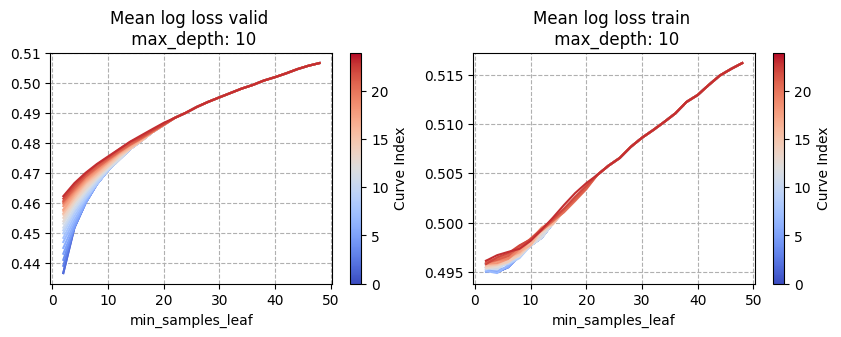

In [ ]:
name = range(2, 12, 2)
pallate = sns.color_palette("coolwarm", 24)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

reshaped_valid = np.array(train_log_means[: 24**2]).reshape(24, -1)
sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=24))

for j in range(reshaped_valid.shape[0]):
    ax[0].plot(range(2, 50, 2), reshaped_valid[j], color=pallate[j])
ax[0].grid(True, linestyle='--')
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_title(f'Mean log loss valid \n max_depth: {name[i-1]}')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
cbar.set_label("Curve Index")

reshaped_train = np.array(val_log_means[: 24**2]).reshape(24, -1)
for j in range(reshaped_train.shape[0]):  # Итерации строк
    ax[1].plot(range(2, 50, 2), reshaped_train[j], color=pallate[j])  # Разные цвета
ax[1].grid(True, linestyle='--')
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_title(f'Mean log loss train \n max_depth: {name[i-1]}')
sm.set_array([])  # Пустая инициализация
cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
cbar.set_label("Curve Index")

plt.show()


Исходя из роста среднего значения log loss на валидации и трейне модель скорее всего переобучается так как в начале (до 5 min samples leaf) значение log loss на обучении стаблиьно примерно а на валидации растет. Тут можно сделать вывод что нужно добавить регуляризацию и самое оптимально значение min_samples_leaf и min_samples_split будет от 2 до 5

получим pr/roc кривые вместе с auc метриками


In [ ]:
train_log_means = []
val_log_means = []

train_acc_means = []
val_acc_means = []

train_f1_mean = []
val_f1_mean = []

for j, k in product(range(2, 5), range(2, 5)):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', FrequencyEncoder())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num),
            ('cat', categorical_transformer, cat)
        ]
    )
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestClassifier(n_estimators=300,
                                            max_depth=10,
                                            min_samples_split=j,
                                            min_samples_leaf=k,
                                            max_features='sqrt',
                                            random_state=42))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    train_scores_log = []
    val_scores_log = []

    train_scores_acc = []
    val_scores_acc = []

    train_scores_f1 = []
    val_scores_f1 = []

    for train_index, val_index in kf.split(train):
        X_train, X_val = train.iloc[train_index], train.iloc[val_index]
        y_train, y_val = y_new[train_index], y_new[val_index]

        model.fit(X_train, y_train)

        # Оценка на обучающих данных
        y_train_pred = model.predict_proba(X_train)[:, 1]
        train_log_loss = log_loss(y_train, y_train_pred)
        train_scores_log.append(train_log_loss)
        y_train_pred_labels = (y_train_pred > 0.5).astype(int)

        # Вычисляем F1-меру
        train_f1 = f1_score(y_train, y_train_pred_labels)
        train_scores_f1.append(train_f1)
        train_acc = accuracy_score(y_train, (y_train_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
        train_scores_acc.append(train_acc)

        # Оценка на валидационных данных
        y_val_pred = model.predict_proba(X_val)[:, 1]
        val_log_loss = log_loss(y_val, y_val_pred)
        val_scores_log.append(val_log_loss)
        y_val_pred_labels = (y_train_pred > 0.5).astype(int)

        # Вычисляем F1-меру
        val_f1 = f1_score(y_train, y_train_pred_labels)
        val_scores_f1.append(val_f1)
        val_acc = accuracy_score(y_val, (y_val_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
        val_scores_acc.append(val_acc)

    # Печать результатов для текущего значения n_estimators
    print(f"min_samples_split: {j}, min_samples_leaf: {k}, Log_loss Mean Train: {np.mean(train_scores_log):.4f}, Log_loss Mean Valid: {np.mean(val_scores_log):.4f}, Accuracy Mean Train: {np.mean(train_scores_acc):.4f}, Accuracy Mean Valid: {np.mean(val_scores_acc):.4f}, F1 Mean Train: {np.mean(train_scores_f1):.4f}, F1 Mean Valid: {np.mean(val_scores_f1):.4f}")

    # Сохраняем результаты
    train_log_means.append(np.mean(train_scores_log))
    val_log_means.append(np.mean(val_scores_log))

    train_acc_means.append(np.mean(train_scores_acc))
    val_acc_means.append(np.mean(val_scores_acc))

    train_f1_mean.append(np.mean(train_scores_f1))
    val_f1_mean.append(np.mean(val_scores_f1))

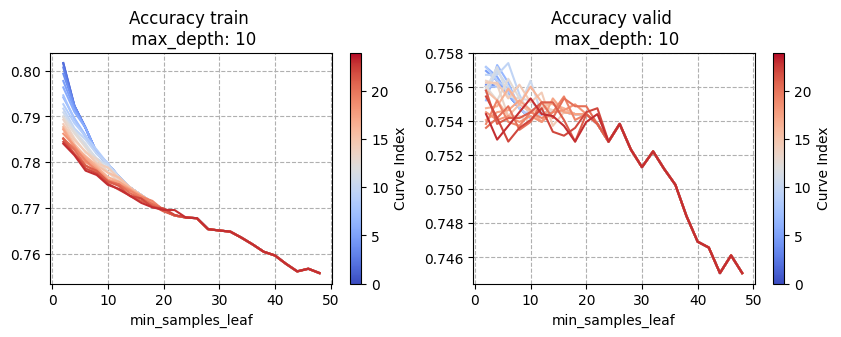

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

reshaped_train = np.array(train_acc_means[: 24**2]).reshape(24, -1)
sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=24))

for j in range(reshaped_train.shape[0]):
    ax[0].plot(range(2, 50, 2), reshaped_train[j], color=pallate[j])
ax[0].grid(True, linestyle='--')
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_title(f'Accuracy train \n max_depth: {name[i-1]}')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
cbar.set_label("Curve Index")

reshaped_valid = np.array(val_acc_means[: 24**2]).reshape(24, -1)
for j in range(reshaped_valid.shape[0]):  # Итерации строк
    ax[1].plot(range(2, 50, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета
ax[1].grid(True, linestyle='--')
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_title(f'Accuracy valid \n max_depth: {name[i-1]}')
sm.set_array([])  # Пустая инициализация
cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
cbar.set_label("Curve Index")

plt.show()

Аналогично на валидации средняя точность при высоких значения min_samples_split модель ведет себя нестабильно так как наблюдаемы колбения accuracy, следовательно стоит вщять значения min_samples_split до 10 по величине

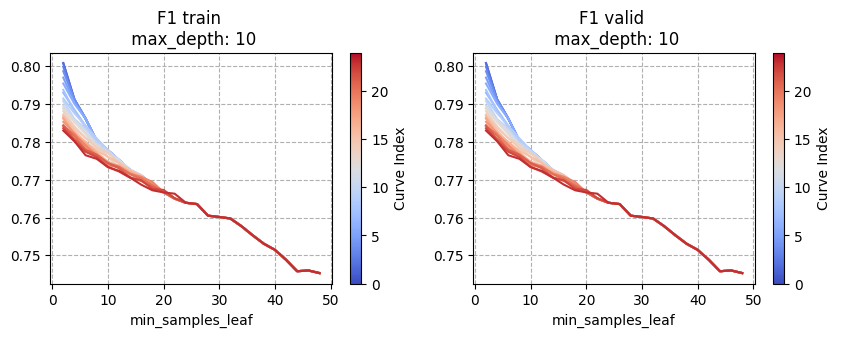

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

reshaped_train = np.array(train_f1_mean[: 24**2]).reshape(24, -1)
sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=24))

for j in range(reshaped_train.shape[0]):
    ax[0].plot(range(2, 50, 2), reshaped_train[j], color=pallate[j])
ax[0].grid(True, linestyle='--')
ax[0].set_xlabel('min_samples_leaf')
ax[0].set_title(f'F1 train \n max_depth: {name[i-1]}')
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
cbar.set_label("Curve Index")

reshaped_valid = np.array(val_f1_mean[: 24**2]).reshape(24, -1)
for j in range(reshaped_valid.shape[0]):  # Итерации строк
    ax[1].plot(range(2, 50, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета
ax[1].grid(True, linestyle='--')
ax[1].set_xlabel('min_samples_leaf')
ax[1].set_title(f'F1 valid \n max_depth: {name[i-1]}')
sm.set_array([])  # Пустая инициализация
cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
cbar.set_label("Curve Index")

plt.show()

На данных графиках опять же видно как модель при увелчении метрик min_samples_split и miт_samples_leaf падает величина F1 то есть гармоническое среднее между точностью и полнотой
Свой примерный диапазон параметров не изменю в связи с данной выборкой

In [ ]:
train_log_means = []
val_log_means = []

train_acc_means = []
val_acc_means = []

train_auc_roc_hist = []
train_auc_pr_hist = []

val_auc_roc_hist = []
val_auc_pr_hist = []

for j, k in product(range(2, 5), range(2, 5)):

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', FrequencyEncoder())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num),
            ('cat', categorical_transformer, cat)
        ]
    )
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestClassifier(n_estimators=300,
                                            max_depth=10,
                                            min_samples_split=j,
                                            min_samples_leaf=k,
                                            max_features='sqrt',
                                            random_state=42))
    ])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    train_scores_log = []
    val_scores_log = []

    train_scores_acc = []
    val_scores_acc = []

    for train_index, val_index in kf.split(train):
        X_train, X_val = train.iloc[train_index], train.iloc[val_index]
        y_train, y_val = y_new[train_index], y_new[val_index]

        model.fit(X_train, y_train)

        # Оценка
        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_val_pred = model.predict_proba(X_val)[:, 1]

        train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
        val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

        train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_pred)
        val_precision, val_recall, _ = precision_recall_curve(y_val, y_val_pred)

        # Вычисляем AUC для ROC и PR кривых
        train_auc_roc = auc(train_fpr, train_tpr)
        val_auc_roc = auc(val_fpr, val_tpr)

        train_auc_pr = average_precision_score(y_train, y_train_pred)
        val_auc_pr = average_precision_score(y_val, y_val_pred)

        train_auc_roc_hist.append(train_auc_roc)
        val_auc_roc_hist.append(val_auc_roc)

        train_auc_pr_hist.append(train_auc_pr)
        val_auc_pr_hist.append(val_auc_pr)

        plt.figure(figsize=(6, 3))

        plt.subplot(1, 2, 1)
        plt.plot(train_fpr, train_tpr, color='blue', label=f'Train ROC curve (AUC = {train_auc_roc:.4f})')
        plt.plot(val_fpr, val_tpr, color='green', label=f'Validation ROC curve (AUC = {val_auc_roc:.4f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve \n max_iter: {l}, max_depth {i}, \n max_leaf_nodes: {j}, min_samples_leaf {k}', size=7)
        plt.grid(True, linestyle='--')
        plt.legend(loc='lower right')

        # Построение PR кривой
        plt.subplot(1, 2, 2)
        plt.plot(train_recall, train_precision, color='blue', label=f'Train PR curve (AUC = {train_auc_pr:.4f})')
        plt.plot(val_recall, val_precision, color='green', label=f'Validation PR curve (AUC = {val_auc_pr:.4f})')
        plt.xlabel('Recall')
        plt.plot([0, 1], [1, 0], color='gray', linestyle='--')
        plt.ylabel('Precision')
        plt.title(f'PR Curve \n max_iter: {l}, max_depth {i}, \n max_leaf_nodes: {j}, min_samples_leaf {k}', size=7)
        plt.grid(True, linestyle='--')
        plt.legend(loc='lower left')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(train_auc_pr_hist)

45

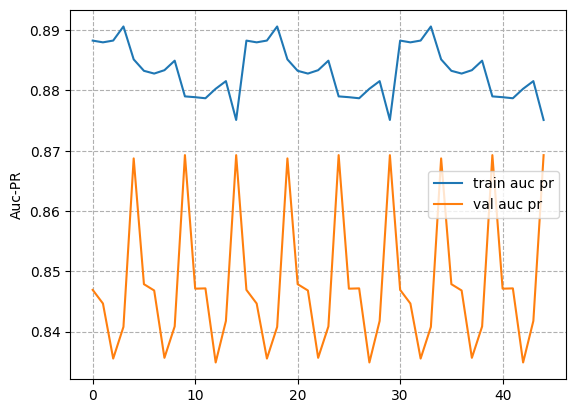

In [ ]:
plt.plot(np.array(train_auc_pr_hist), label='train auc pr')
plt.plot(np.array(val_auc_pr_hist), label='val auc pr')
plt.ylabel('Auc-PR')
plt.grid(True, linestyle='--')
plt.legend()

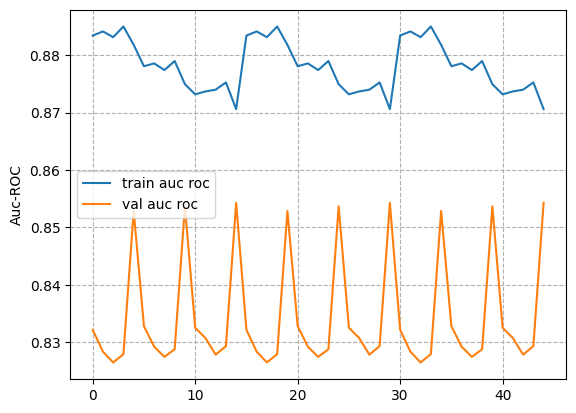

In [ ]:
plt.plot(np.array(train_auc_roc_hist), label='train auc roc')
plt.plot(np.array(val_auc_roc_hist), label='val auc roc')
plt.ylabel('Auc-ROC')
plt.grid(True, linestyle='--')
plt.legend()

По данным графиков auc-roc/pr можно сказать что сильно каких то различий нет, значит можно взять гиперпараметры min_samples_split=3, min_samples_leaf=3 так как они усредненные
В результате анализа получим модель RandomForestClassifier с гиперпараметрами un_estimators=300, max_depth=10, min_samples_split=3, min_samples_leaf=3, max_features='sqrt'.
Обучим модель итоговую и построим на ее усредненные параметры при кроссвалидации


In [ ]:
train_auc_roc_hist = []
val_auc_roc_hist = []

train_auc_pr_hist = []
val_auc_pr_hist = []
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', FrequencyEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num),
        ('cat', categorical_transformer, cat)
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(n_estimators=300,
                                        max_depth=10,
                                        min_samples_split=3,
                                        min_samples_leaf=3,
                                        max_features='sqrt',
                                        random_state=42))
])

for train_index, val_index in kf.split(train):
    X_train, X_val = train.iloc[train_index], train.iloc[val_index]
    y_train, y_val = y_new[train_index], y_new[val_index]

    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_log_loss = log_loss(y_train, y_train_pred)
    train_scores_log.append(train_log_loss)
    y_train_pred_labels = (y_train_pred > 0.5).astype(int)

    # F1-меру для обучающих
    train_f1 = f1_score(y_train, y_train_pred_labels)
    train_scores_f1.append(train_f1)
    train_acc = accuracy_score(y_train, y_train_pred_labels)  # Используем метки
    train_scores_acc.append(train_acc)

    # Оценка на валидации
    y_val_pred = model.predict_proba(X_val)[:, 1]
    val_log_loss = log_loss(y_val, y_val_pred)
    val_scores_log.append(val_log_loss)
    y_val_pred_labels = (y_val_pred > 0.5).astype(int)

    # F1 для валидации
    val_f1 = f1_score(y_val, y_val_pred_labels)
    val_scores_f1.append(val_f1)
    val_acc = accuracy_score(y_val, y_val_pred_labels)  # Используем метки
    val_scores_acc.append(val_acc)

    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
    val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

    train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_pred)
    val_precision, val_recall, _ = precision_recall_curve(y_val, y_val_pred)

    # AUC для ROC PR
    train_auc_roc = auc(train_fpr, train_tpr)
    val_auc_roc = auc(val_fpr, val_tpr)

    train_auc_pr = average_precision_score(y_train, y_train_pred)
    val_auc_pr = average_precision_score(y_val, y_val_pred)

    train_auc_roc_hist.append(train_auc_roc)
    val_auc_roc_hist.append(val_auc_roc)

    train_auc_pr_hist.append(train_auc_pr)
    val_auc_pr_hist.append(val_auc_pr)

print(f"Log_loss Mean Train: {np.mean(train_scores_log):.4f}, Log_loss Mean Valid: {np.mean(val_scores_log):.4f}\n"
      f"Accuracy Mean Train: {np.mean(train_scores_acc):.4f}, Accuracy Mean Valid: {np.mean(val_scores_acc):.4f}\n"
      f"F1 Mean Train: {np.mean(train_scores_f1):.4f}, F1 Mean Valid: {np.mean(val_scores_f1):.4f}\n"
      f"AUC ROC Mean Train: {np.mean(train_auc_roc_hist):.4f}, AUC ROC Mean Valid: {np.mean(val_auc_roc_hist):.4f}\n"
      f"AUC PR Mean Train: {np.mean(train_auc_pr_hist):.4f}, AUC PR Mean Valid: {np.mean(val_auc_pr_hist):.4f}")

NameError: name 'Pipeline' is not defined

Сделаем анализ для классификации с помощью классификатора градиентного бустинга HistGradientBoostingClassifier и подберем оптимальные параметры под него

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [ ]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [ ]:
train[num] = SimpleImputer(strategy='mean').fit_transform(train[num])

In [ ]:
train[num].isna().sum()

Age             0
FoodCourt       0
ShoppingMall    0
dtype: int64

In [ ]:
X_train = SimpleImputer(strategy='constant', fill_value='missing').fit_transform(X_train)

In [ ]:
train_log_means = []
val_log_means = []

train_acc_means = []
val_acc_means = []

train_f1_means = []
val_f1_means = []

for i in range(2, 40, 5):

  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
  ])
  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
      ('onehot', FrequencyEncoder())
  ])
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, num),
          ('cat', categorical_transformer, cat)
      ]
  )
  model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', HistGradientBoostingClassifier(max_iter=i,
                                          random_state=42))
  ])

  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  train_scores_log = []
  val_scores_log = []

  train_scores_acc = []
  val_scores_acc = []

  train_scores_f1 = []
  val_scores_f1 = []

  for train_index, val_index in kf.split(train):
      X_train, X_val = train.iloc[train_index], train.iloc[val_index]
      y_train, y_val = y_new[train_index], y_new[val_index]

      model.fit(X_train, y_train)

      # Оценка на обучающих данных
      y_train_pred = model.predict_proba(X_train)[:, 1]
      train_log_loss = log_loss(y_train, y_train_pred)
      train_scores_log.append(train_log_loss)
      y_train_pred_labels = (y_train_pred > 0.5).astype(int)

      # Вычисляем F1-меру
      train_f1 = f1_score(y_train, y_train_pred_labels)
      train_scores_f1.append(train_f1)
      train_acc = accuracy_score(y_train, (y_train_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
      train_scores_acc.append(train_acc)

      # Оценка на валидационных данных
      y_val_pred = model.predict_proba(X_val)[:, 1]
      val_log_loss = log_loss(y_val, y_val_pred)
      val_scores_log.append(val_log_loss)
      y_val_pred_labels = (y_train_pred > 0.5).astype(int)

      # Вычисляем F1-меру
      val_f1 = f1_score(y_train, y_train_pred_labels)
      val_scores_f1.append(val_f1)
      val_acc = accuracy_score(y_val, (y_val_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
      val_scores_acc.append(val_acc)

  # Печать результатов для текущего значения n_estimators
  print(f"max_iter: {i}, Log_loss Mean Train: {np.mean(train_scores_log):.4f}, Log_loss Mean Valid: {np.mean(val_scores_log):.4f}, Accuracy Mean Train: {np.mean(train_scores_acc):.4f}, Accuracy Mean Valid: {np.mean(val_scores_acc):.4f}, F1 Mean Train: {np.mean(train_scores_f1):.4f}, F1 Mean Valid: {np.mean(val_scores_f1):.4f}")

  # Сохраняем результаты
  train_log_means.append(np.mean(train_scores_log))
  val_log_means.append(np.mean(val_scores_log))

  train_acc_means.append(np.mean(train_scores_acc))
  val_acc_means.append(np.mean(val_scores_acc))

  train_f1_means.append(np.mean(train_scores_f1))
  val_f1_means.append(np.mean(val_scores_f1))

max_iter: 2, Log_loss Mean Train: 0.6311, Log_loss Mean Valid: 0.6343, Accuracy Mean Train: 0.7656, Accuracy Mean Valid: 0.7497, F1 Mean Train: 0.7720, F1 Mean Valid: 0.7720
max_iter: 7, Log_loss Mean Train: 0.5468, Log_loss Mean Valid: 0.5568, Accuracy Mean Train: 0.7683, Accuracy Mean Valid: 0.7545, F1 Mean Train: 0.7701, F1 Mean Valid: 0.7701
max_iter: 12, Log_loss Mean Train: 0.5081, Log_loss Mean Valid: 0.5234, Accuracy Mean Train: 0.7705, Accuracy Mean Valid: 0.7565, F1 Mean Train: 0.7727, F1 Mean Valid: 0.7727
max_iter: 17, Log_loss Mean Train: 0.4880, Log_loss Mean Valid: 0.5084, Accuracy Mean Train: 0.7740, Accuracy Mean Valid: 0.7573, F1 Mean Train: 0.7776, F1 Mean Valid: 0.7776
max_iter: 22, Log_loss Mean Train: 0.4764, Log_loss Mean Valid: 0.5012, Accuracy Mean Train: 0.7751, Accuracy Mean Valid: 0.7565, F1 Mean Train: 0.7788, F1 Mean Valid: 0.7788
max_iter: 27, Log_loss Mean Train: 0.4691, Log_loss Mean Valid: 0.4977, Accuracy Mean Train: 0.7776, Accuracy Mean Valid: 0.756

Text(0.5, 1.0, 'Accuracy on train/valid from Max_iter')

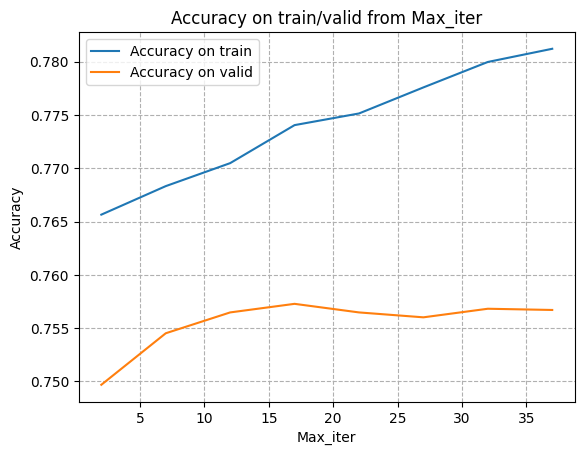

In [ ]:
plt.plot(range(2,40,5), train_acc_means, label='Accuracy on train')
plt.plot(range(2,40,5), val_acc_means, label='Accuracy on valid')
plt.grid(True,linestyle='--')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy on train/valid from Max_iter')

Text(0.5, 1.0, 'Log loss on train/valid from Max_iter')

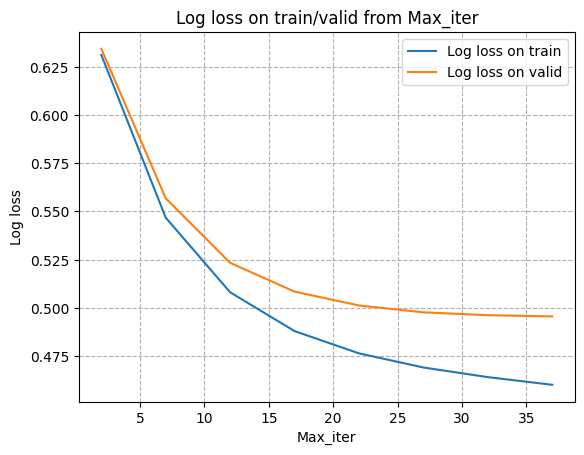

In [ ]:
plt.plot(range(2,40,5), train_log_means, label='Log loss on train')
plt.plot(range(2,40,5), val_log_means, label='Log loss on valid')
plt.grid(True,linestyle='--')
plt.xlabel('Max_iter')
plt.ylabel('Log loss')
plt.legend()
plt.title('Log loss on train/valid from Max_iter')

Text(0.5, 1.0, 'F1 on train/valid from Max_iter')

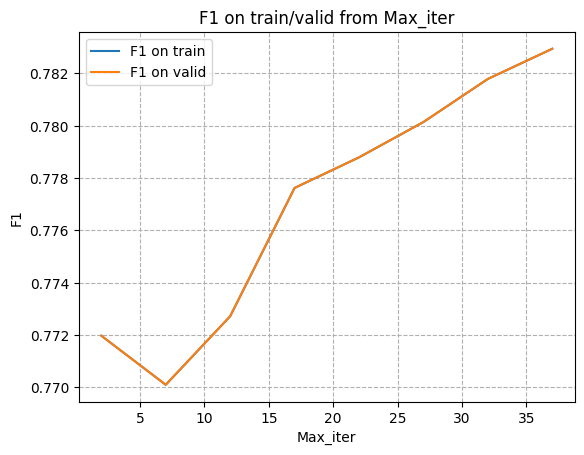

In [ ]:
plt.plot(range(2,40,5), train_f1_means, label='F1 on train')
plt.plot(range(2,40,5), val_f1_means, label='F1 on valid')
plt.grid(True,linestyle='--')
plt.xlabel('Max_iter')
plt.ylabel('F1')
plt.legend()
plt.title('F1 on train/valid from Max_iter')

Text(0.5, 1.0, 'F1 on train/valid from Max_iter')

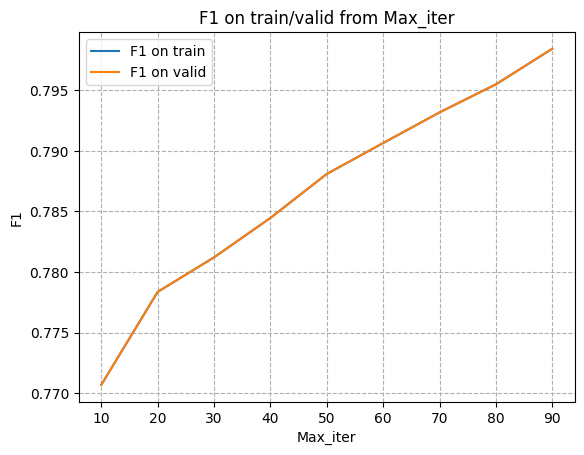

In [ ]:
plt.plot(range(10,100,10), train_f1_means, label='F1 on train')
plt.plot(range(10,100,10), val_f1_means, label='F1 on valid')
plt.grid(True,linestyle='--')
plt.xlabel('Max_iter')
plt.ylabel('F1')
plt.legend()
plt.title('F1 on train/valid from Max_iter')

Видно что модель на max_iter больше 40 уже начинает переобучаться, так как log loss на валидации начинает расти а на train падать
Accracy на train и valid отклоняется сильно, а F1 совпадет, модель ведет себя странно, будем смотерть то что происходит до max_iter=40
Судя по зависимостям метрик Accuracy, F1, Log loss задачи классификации HistGradientBoostingClassifier можно понять что подходящим значением будет max_iter=35, так как log loss на валидации выходит на пологое значение в данной точке, вместе с  accuracy, F1 метрика на валидации и train принимает близкие значения и характеры значений, так как при больших значениях максимальных итерции происходит расхождение то примим max_iter=35

In [ ]:
!ls

sample_submission.csv  test.csv  train.csv


In [ ]:
with open("data2.txt", "r", encoding="utf-8") as file:
  lines = file.read()
  pattern = r"Log_loss Mean Train:\s*([\d.]+)"
  marches = re.findall(pattern, lines)
  Loss_Mean_train = [float(num.strip("'")) for num in marches]

  pattern = r"Log_loss Mean Valid:\s*([\d.]+)"
  marches = re.findall(pattern, lines)
  Loss_Mean_valid = [float(num.strip("'")) for num in marches]

  pattern = r"Accuracy Mean Train:\s*([\d.]+)"
  marches = re.findall(pattern, lines)
  Acc_Mean_train = [float(num.strip("'")) for num in marches]

  pattern = r"Accuracy Mean Valid:\s*([\d.]+)"
  marches = re.findall(pattern, lines)
  Acc_Mean_valid = [float(num.strip("'")) for num in marches]

  pattern = r"F1 Mean Train:\s*([\d.]+)"
  marches = re.findall(pattern, lines)
  F1_Mean_train = [float(num.strip("'")) for num in marches]

  pattern = r"F1 Mean Valid:\s*([\d.]+)"
  marches = re.findall(pattern, lines)
  F1_Mean_valid = [float(num.strip("'")) for num in marches]

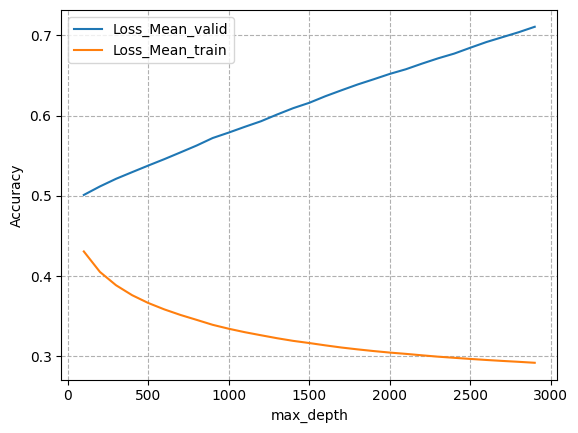

In [ ]:
plt.plot(range(100,3000,100), Loss_Mean_valid,label='Loss_Mean_valid')
plt.plot(range(100,3000,100), Loss_Mean_train,label='Loss_Mean_train')
plt.grid(True, linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

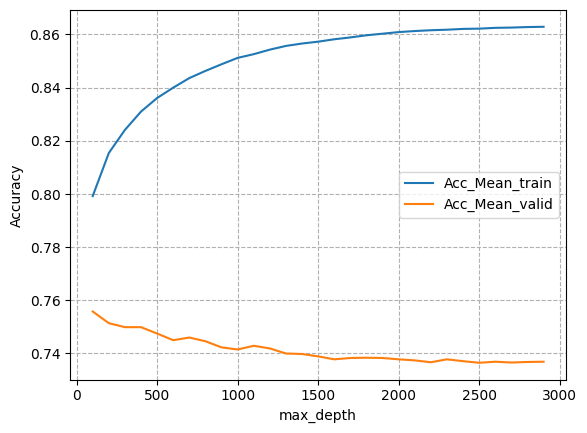

In [ ]:
plt.plot(range(100,3000,100), Acc_Mean_train,label='Acc_Mean_train')
plt.plot(range(100,3000,100), Acc_Mean_valid,label='Acc_Mean_valid')
plt.grid(True, linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

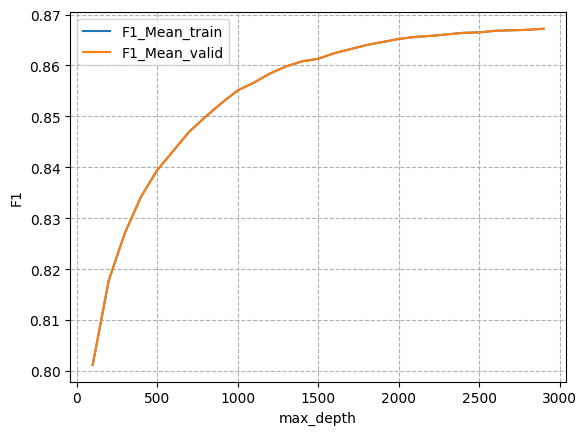

In [ ]:
plt.plot(range(100,3000,100), F1_Mean_train,label='F1_Mean_train')
plt.plot(range(100,3000,100), F1_Mean_valid,label='F1_Mean_valid')
plt.grid(True, linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('F1')
plt.legend()

Исхояд из такого большого отк

In [ ]:
train_scores = []
val_scores = []

train_mse_means = []
val_mse_means = []

for i, j, k in product(range(2, 10, 2), range(2, 10, 2), range(2, 10, 2)):
#for i, j, k in product(range(2, 20, 2), range(2, 20, 2), range(2, 20, 2)):
  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
  ])
  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
      ('onehot', FrequencyEncoder())
  ])
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, num),
          ('cat', categorical_transformer, cat)
      ]
  )
  model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', HistGradientBoostingClassifier(max_iter=35,
                                          max_depth=i,
                                          max_leaf_nodes = j,
                                          min_samples_leaf = k,
                                          random_state=42))
  ])

  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  train_scores_log = []
  val_scores_log = []

  train_scores_acc = []
  val_scores_acc = []

  train_scores_f1 = []
  val_scores_f1 = []

  for train_index, val_index in kf.split(train):
      X_train, X_val = train.iloc[train_index], train.iloc[val_index]
      y_train, y_val = y_new[train_index], y_new[val_index]

      model.fit(X_train, y_train)

      # Оценка на обучающих данных
      y_train_pred = model.predict_proba(X_train)[:, 1]
      train_log_loss = log_loss(y_train, y_train_pred)
      train_scores_log.append(train_log_loss)
      y_train_pred_labels = (y_train_pred > 0.5).astype(int)

      # Вычисляем F1-меру
      train_f1 = f1_score(y_train, y_train_pred_labels)
      train_scores_f1.append(train_f1)
      train_acc = accuracy_score(y_train, (y_train_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
      train_scores_acc.append(train_acc)

      # Оценка на валидационных данных
      y_val_pred = model.predict_proba(X_val)[:, 1]
      val_log_loss = log_loss(y_val, y_val_pred)
      val_scores_log.append(val_log_loss)
      y_val_pred_labels = (y_train_pred > 0.5).astype(int)

      # Вычисляем F1-меру
      val_f1 = f1_score(y_train, y_train_pred_labels)
      val_scores_f1.append(val_f1)
      val_acc = accuracy_score(y_val, (y_val_pred > 0.5).astype(int))  # Преобразуем вероятности в метки
      val_scores_acc.append(val_acc)

  # Печать результатов для текущего значения n_estimators
  print(f"max_depth: {i}, max_leaf_nodes: {j}, min_samples_leaf: {k}, Log_loss Mean Train: {np.mean(train_scores_log):.4f}, Log_loss Mean Valid: {np.mean(val_scores_log):.4f}, Accuracy Mean Train: {np.mean(train_scores_acc):.4f}, Accuracy Mean Valid: {np.mean(val_scores_acc):.4f}, F1 Mean Train: {np.mean(train_scores_f1):.4f}, F1 Mean Valid: {np.mean(val_scores_f1):.4f}")

  # Сохраняем результаты
  train_log_means.append(np.mean(train_scores_log))
  val_log_means.append(np.mean(val_scores_log))

  train_acc_means.append(np.mean(train_scores_acc))
  val_acc_means.append(np.mean(val_scores_acc))

  train_f1_mean.append(np.mean(train_scores_f1))
  val_f1_mean.append(np.mean(val_scores_f1))

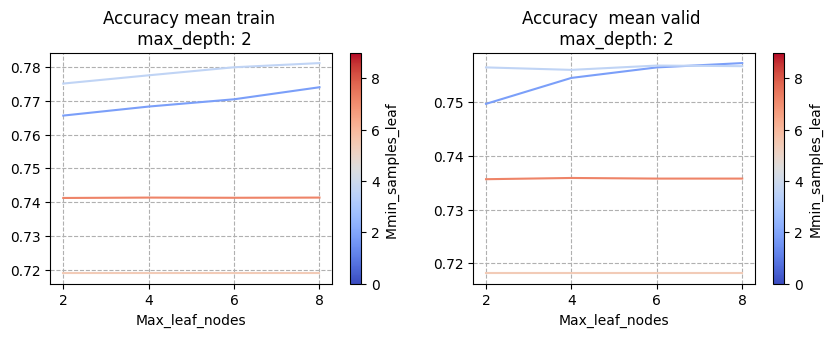

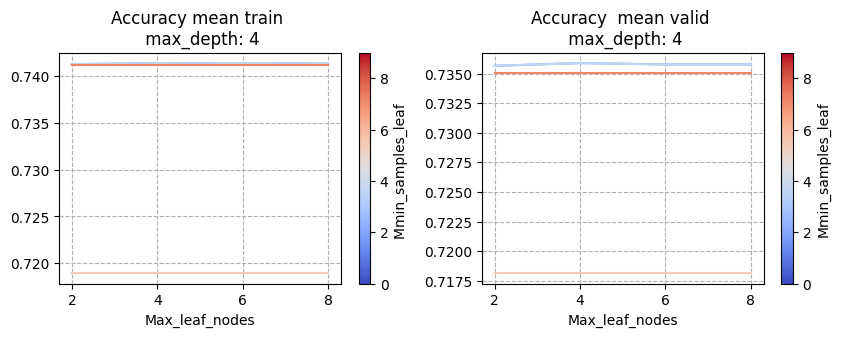

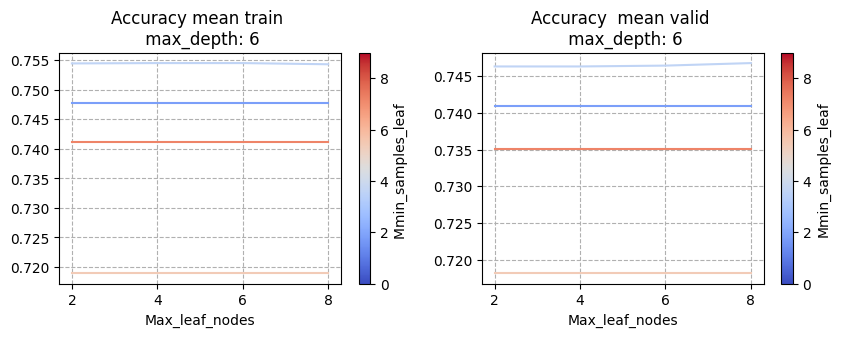

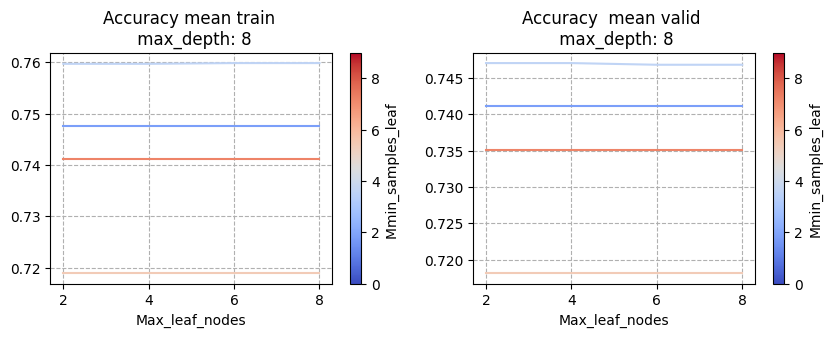

In [ ]:
name = range(2, 10, 2)
pallate = sns.color_palette("coolwarm", 4)
for  i in range(1, 5):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))

  reshaped_train = np.array(train_acc_means[(i-1)*4**2 : i*4**2]).reshape(4, -1)
  sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=9))

  for j in range(reshaped_train.shape[0]):
    ax[0].plot(range(2, 10, 2), reshaped_train[j], color=pallate[j])

  ax[0].grid(True, linestyle='--')
  ax[0].set_xlabel('Max_leaf_nodes')
  ax[0].set_title(f'Accuracy mean train \n max_depth: {name[i-1]}')

  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
  cbar.set_label("Mmin_samples_leaf ")

  reshaped_valid = np.array(val_acc_means[(i-1)*4**2 : i*4**2]).reshape(4, -1)
  for j in range(reshaped_valid.shape[0]):  # Итерации строк
      ax[1].plot(range(2, 10, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета

  ax[1].grid(True, linestyle='--')
  ax[1].set_xlabel('Max_leaf_nodes')
  ax[1].set_title(f'Accuracy  mean valid \n max_depth: {name[i-1]}')

  sm.set_array([])  # Пустая инициализация
  cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
  cbar.set_label("Mmin_samples_leaf")

  plt.show()

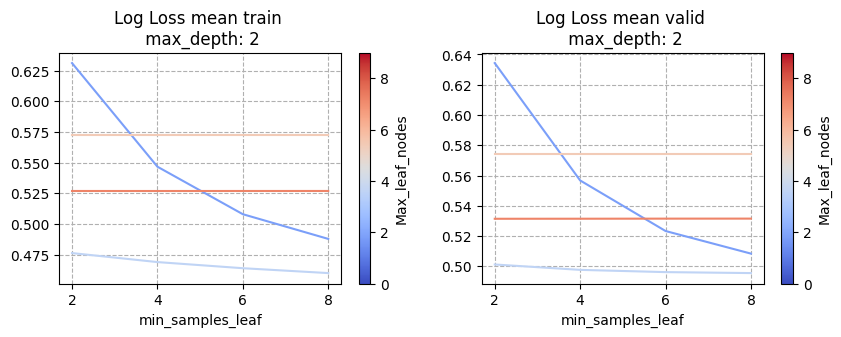

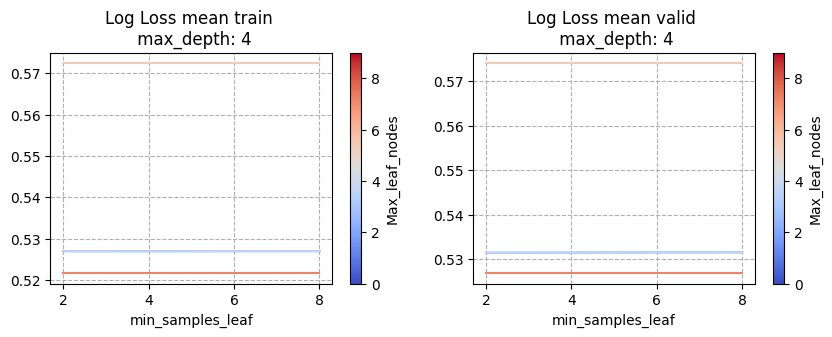

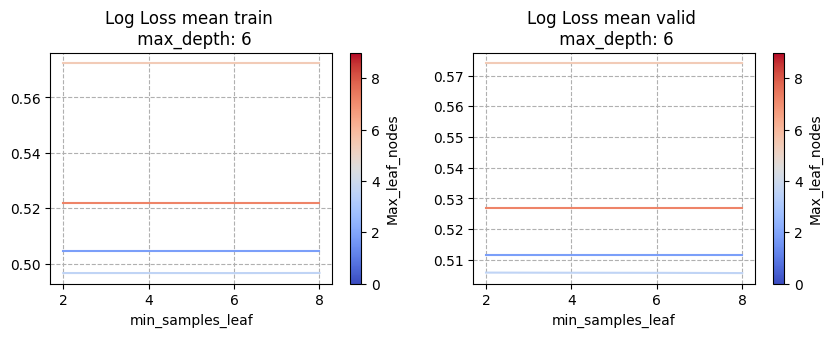

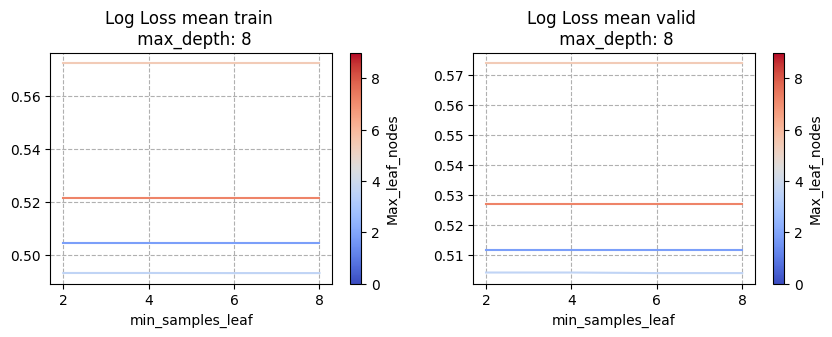

In [ ]:
name = range(2, 10, 2)
pallate = sns.color_palette("coolwarm", 4)
for  i in range(1, 5):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))

  reshaped_train = np.array(train_log_means[(i-1)*4**2 : i*4**2]).reshape(4, -1)
  sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=9))

  for j in range(reshaped_train.shape[0]):
    ax[0].plot(range(2, 10, 2), reshaped_train[j], color=pallate[j])

  ax[0].grid(True, linestyle='--')
  ax[0].set_xlabel('min_samples_leaf')
  ax[0].set_title(f'Log Loss mean train \n max_depth: {name[i-1]}')

  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
  cbar.set_label("Max_leaf_nodes")

  reshaped_valid = np.array(val_log_means[(i-1)*4**2 : i*4**2]).reshape(4, -1)
  for j in range(reshaped_valid.shape[0]):  # Итерации строк
      ax[1].plot(range(2, 10, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета

  ax[1].grid(True, linestyle='--')
  ax[1].set_xlabel('min_samples_leaf')
  ax[1].set_title(f'Log Loss mean valid \n max_depth: {name[i-1]}')

  sm.set_array([])  # Пустая инициализация
  cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
  cbar.set_label("Max_leaf_nodes")

  plt.show()

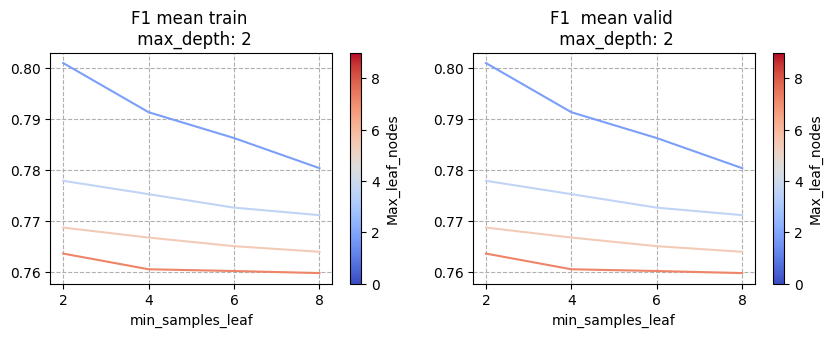

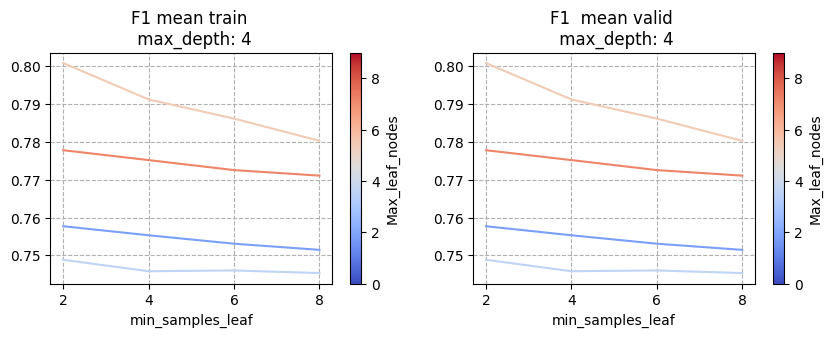

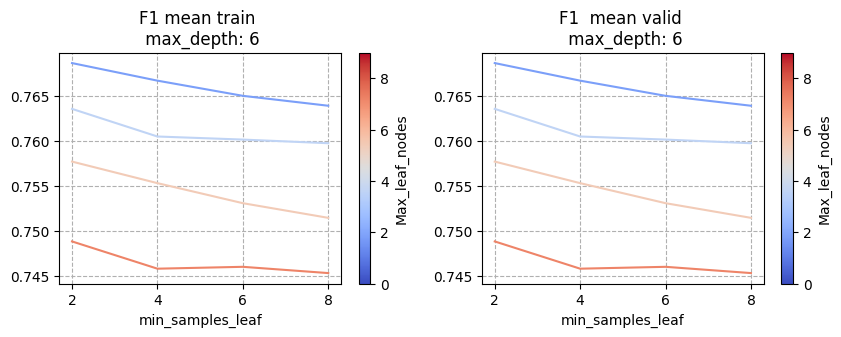

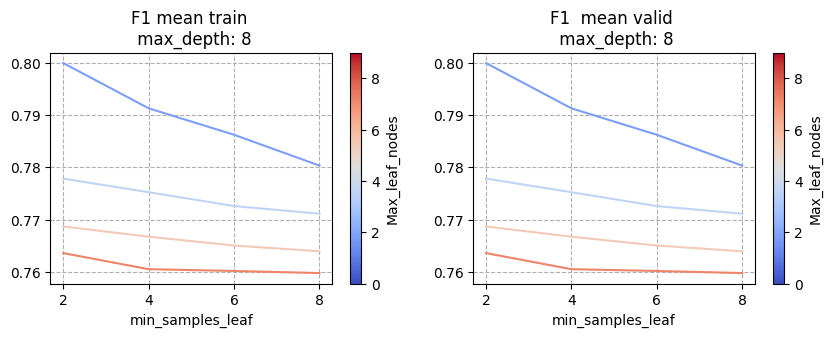

In [ ]:
name = range(2, 10, 2)
pallate = sns.color_palette("coolwarm", 4)
for  i in range(1, 5):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))

  reshaped_train = np.array(train_f1_mean[(i-1)*4**2 : i*4**2]).reshape(4, -1)
  sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=9))

  for j in range(reshaped_train.shape[0]):
    ax[0].plot(range(2, 10, 2), reshaped_train[j], color=pallate[j])

  ax[0].grid(True, linestyle='--')
  ax[0].set_xlabel('min_samples_leaf')
  ax[0].set_title(f'F1 mean train \n max_depth: {name[i-1]}')

  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
  cbar.set_label("Max_leaf_nodes")

  reshaped_valid = np.array(val_f1_mean[(i-1)*4**2 : i*4**2]).reshape(4, -1)
  for j in range(reshaped_valid.shape[0]):  # Итерации строк
      ax[1].plot(range(2, 10, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета

  ax[1].grid(True, linestyle='--')
  ax[1].set_xlabel('min_samples_leaf')
  ax[1].set_title(f'F1  mean valid \n max_depth: {name[i-1]}')

  sm.set_array([])  # Пустая инициализация
  cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
  cbar.set_label("Max_leaf_nodes")

  plt.show()

Графики метрик F1, Accuracy, Log loss не имеют каких либо сущесттвенных отклолонений либо резких скачков, но log loss accuracy, стаблизиируется (принимает прнимает околоконстантное значение) для всех вариантивных параметров уже c max_depth=4

Впринципе можно сказать что для HistGraddientBoostingClassifier оптимальные гиперпараметры будет (max_iter = 35, max_depth = 6, min_sample_leaf = 4, max_leaf_nodes = 4)
так как при таких параметрах не наблюдается резких скачков графиков accuracy и log loss с уровня на уровень

Построим pr, roc кирвые для модели с гиперпараметрами из этого окружения

In [ ]:
for l, i, j, k in product(range(34, 37, 1), range(4,7), range(3, 6), range(3, 6)):
#for i, j, k in product(range(2, 20, 2), range(2, 20, 2), range(2, 20, 2)):
  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
  ])
  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
      ('onehot', FrequencyEncoder())
  ])
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, num),
          ('cat', categorical_transformer, cat)
      ]
  )
  model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', HistGradientBoostingClassifier(max_iter=l,
                                          max_depth=i,
                                          max_leaf_nodes = j,
                                          min_samples_leaf = k,
                                          random_state=42))
  ])

  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  train_scores_log = []
  val_scores_log = []

  train_scores_acc = []
  val_scores_acc = []

  train_scores_f1 = []
  val_scores_f1 = []

  for train_index, val_index in kf.split(train):
      X_train, X_val = train.iloc[train_index], train.iloc[val_index]
      y_train, y_val = y_new[train_index], y_new[val_index]

      model.fit(X_train, y_train)

      # Оценка
      y_train_pred = model.predict_proba(X_train)[:, 1]
      y_val_pred = model.predict_proba(X_val)[:, 1]

      train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
      val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

      train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_pred)
      val_precision, val_recall, _ = precision_recall_curve(y_val, y_val_pred)

      # Вычисляем AUC для ROC и PR кривых
      train_auc_roc = auc(train_fpr, train_tpr)
      val_auc_roc = auc(val_fpr, val_tpr)

      train_auc_pr = average_precision_score(y_train, y_train_pred)
      val_auc_pr = average_precision_score(y_val, y_val_pred)

      plt.figure(figsize=(6, 3))

      plt.subplot(1, 2, 1)
      plt.plot(train_fpr, train_tpr, color='blue', label=f'Train ROC curve (AUC = {train_auc_roc:.4f})')
      plt.plot(val_fpr, val_tpr, color='green', label=f'Validation ROC curve (AUC = {val_auc_roc:.4f})')
      plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f'ROC Curve \n max_iter: {l}, max_depth {i}, \n max_leaf_nodes: {j}, min_samples_leaf {k}', size=7)
      plt.grid(True, linestyle='--')
      plt.legend(loc='lower right')

      # Построение PR кривой
      plt.subplot(1, 2, 2)
      plt.plot(train_recall, train_precision, color='blue', label=f'Train PR curve (AUC = {train_auc_pr:.4f})')
      plt.plot(val_recall, val_precision, color='green', label=f'Validation PR curve (AUC = {val_auc_pr:.4f})')
      plt.xlabel('Recall')
      plt.plot([0, 1], [1, 0], color='gray', linestyle='--')
      plt.ylabel('Precision')
      plt.title(f'PR Curve \n max_iter: {l}, max_depth {i}, \n max_leaf_nodes: {j}, min_samples_leaf {k}', size=7)
      plt.grid(True, linestyle='--')
      plt.legend(loc='lower left')

      plt.tight_layout()
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

В качестве опреденности можно взять max_iter=36, max_depth=6, max_leaf_nodes=5, min_samples_leaf=5
Соберем модель и сделаем predict на тестовой части файла и глянем на метрики

In [ ]:
train_auc_roc_hist = []
val_auc_roc_hist = []

train_auc_pr_hist = []
val_auc_pr_hist = []
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', FrequencyEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num),
        ('cat', categorical_transformer, cat)
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingClassifier(max_iter=36,
                                        max_depth=6,
                                        max_leaf_nodes = 5,
                                        min_samples_leaf = 5,
                                        random_state=42))
])

for train_index, val_index in kf.split(train):
    X_train, X_val = train.iloc[train_index], train.iloc[val_index]
    y_train, y_val = y_new[train_index], y_new[val_index]

    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_log_loss = log_loss(y_train, y_train_pred)
    train_scores_log.append(train_log_loss)
    y_train_pred_labels = (y_train_pred > 0.5).astype(int)

    # Вычисляем F1-меру для обучающих данных
    train_f1 = f1_score(y_train, y_train_pred_labels)
    train_scores_f1.append(train_f1)
    train_acc = accuracy_score(y_train, y_train_pred_labels)  # Используем метки
    train_scores_acc.append(train_acc)

    y_val_pred = model.predict_proba(X_val)[:, 1]
    val_log_loss = log_loss(y_val, y_val_pred)
    val_scores_log.append(val_log_loss)
    y_val_pred_labels = (y_val_pred > 0.5).astype(int)

    #F1-меру для валид
    val_f1 = f1_score(y_val, y_val_pred_labels)
    val_scores_f1.append(val_f1)
    val_acc = accuracy_score(y_val, y_val_pred_labels)  # Используем метки
    val_scores_acc.append(val_acc)

    # ROC и PR кривые для обучающих данных
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
    val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

    train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_pred)
    val_precision, val_recall, _ = precision_recall_curve(y_val, y_val_pred)

    # AUC для ROC и PR
    train_auc_roc = auc(train_fpr, train_tpr)
    val_auc_roc = auc(val_fpr, val_tpr)

    train_auc_pr = average_precision_score(y_train, y_train_pred)
    val_auc_pr = average_precision_score(y_val, y_val_pred)

    train_auc_roc_hist.append(train_auc_roc)
    val_auc_roc_hist.append(val_auc_roc)

    train_auc_pr_hist.append(train_auc_pr)
    val_auc_pr_hist.append(val_auc_pr)

print(f"Log_loss Mean Train: {np.mean(train_scores_log):.4f}, Log_loss Mean Val {np.mean(val_scores_log):.4f}\n",
      f"Accuracy Mean Train: {np.mean(train_scores_acc):.4f}, Accuracy Mean Val: {np.mean(val_scores_acc):.4f}\n",
      f"F1 Mean Train: {np.mean(train_scores_f1):.4f}, F1 Mean Valid: {np.mean(val_scores_f1):.4f}\n",
      f"AUC ROC Mean Train: {np.mean(train_auc_roc_hist):.4f}, AUC ROC Mean Val: {np.mean(val_auc_roc_hist):.4f}\n",
      f"AUC PR Mean Train: {np.mean(train_auc_pr_hist):.4f}, AUC PR Mean Valid: {np.mean(val_auc_pr_hist):.4f}\n")

Log_loss Mean Train: 0.4715, Log_loss Mean Val 0.5038
 Accuracy Mean Train: 0.7753, Accuracy Mean Val: 0.7495
 F1 Mean Train: 0.7692, F1 Mean Valid: 0.7501
 AUC ROC Mean Train: 0.8297, AUC ROC Mean Val: 0.8237
 AUC PR Mean Train: 0.8400, AUC PR Mean Valid: 0.8343



На RandomForestClassifier

Log_loss Mean Train: 0.4671, Log_loss Mean Valid: 0.5024

Accuracy Mean Train: 0.7788, Accuracy Mean Valid: 0.7508

F1 Mean Train: 0.7736, F1 Mean Valid: 0.7509

AUC ROC Mean Train: 0.8776, AUC ROC Mean Valid: 0.8344

AUC PR Mean Train: 0.8827, AUC PR Mean Valid: 0.8481

Исходя из данных по метрикам AUC-ROC и AUC-PR случайное дерево различает лучше бинарные классы на данном датасете и поддерживает высокий уровень точности и полноты одновременно по сравнению с моделью классификатором градиентного бустинга (≈0.5) и (≈0.1)
И последняя модель показывает выше метрики  log loss на train и валидации (≈0.1, ≈0.01) как раз и говорит, что модель градиентного бустинга  незначительно, но хуже предсказывает вероятности к истинный меткам, F1 мера в свою очередь это тоже подтверждает (≈0.1, ≈0.0008). Но стоит отметить, что модель градиентного бустинга в свою очередеь на порядок быстрее обучается и выводит теже метрики чем случайное дерево (было замечено в процессе обучения)

Визуализируем метрики для наглядомного сравнения качества обоих методов

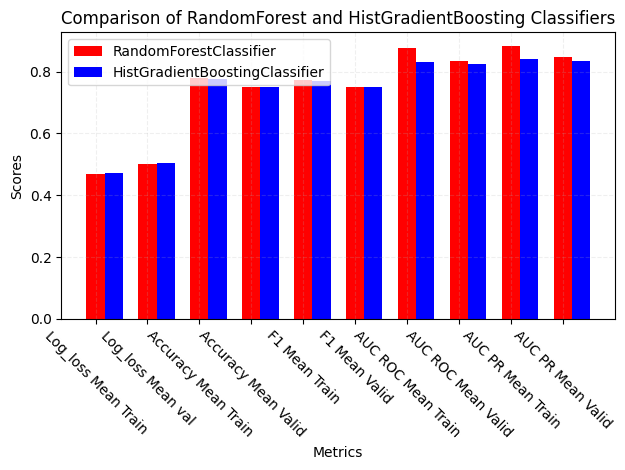

In [ ]:
RandomForestClassifier = [0.4671,0.5024,0.7788,0.7508,0.7736,0.7509,0.8776,0.8344,0.8827,0.8484]
HistGradientBoostingClassifier = [0.4715, 0.5038, 0.7753, 0.7495, 0.7692, 0.7501, 0.8297, 0.8237, 0.8400, 0.8343]

bar_width = 0.35

index = np.arange(len(RandomForestClassifier))

plt.bar(index, RandomForestClassifier, bar_width, label='RandomForestClassifier', color='red')
plt.bar(index + bar_width, HistGradientBoostingClassifier, bar_width, label='HistGradientBoostingClassifier', color='blue')

plt.xticks(index , ['Log_loss Mean Train', 'Log_loss Mean val', 'Accuracy Mean Train', 'Accuracy Mean Valid',
                                   'F1 Mean Train', 'F1 Mean Valid', 'AUC ROC Mean Train', 'AUC ROC Mean Valid',
                                   'AUC PR Mean Train', 'AUC PR Mean Valid'], rotation=-45)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of RandomForest and HistGradientBoosting Classifiers')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
  ])
  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
      ('freqenc', FrequencyEncoder())
  ])
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, num),
          ('cat', categorical_transformer, cat)
      ]
  )
  model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('regressor', HistGradientBoostingClassifier(max_iter=36,
                                          max_depth=6,
                                          max_leaf_nodes = 5,
                                          min_samples_leaf = 5,
                                          random_state=42))
  ])
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  train_scores_log = []
  val_scores_log = []

  train_scores_acc = []
  val_scores_acc = []

  train_scores_f1 = []
  val_scores_f1 = []
  y_pred= []
  for train_index, val_index in kf.split(train):
      X_train, X_val = train.iloc[train_index], train.iloc[val_index]
      y_train, y_val = y_new[train_index], y_new[val_index]

      model.fit(X_train, y_train)
      y_predict = model.predict(X_train)
      y_pred.append(y_predict)

Text(0.5, 1.0, 'y_predict from number of split in cross validation')

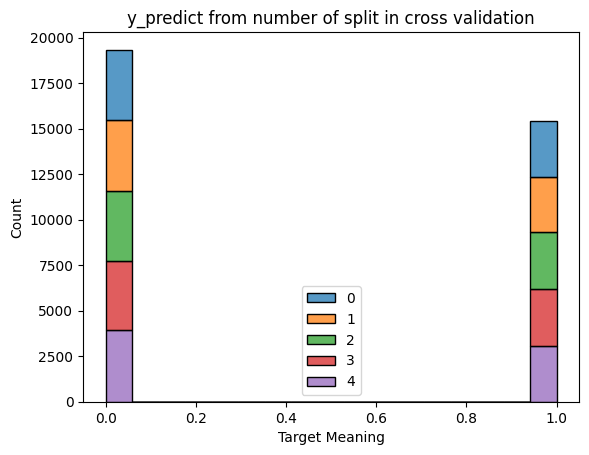

In [ ]:
sns.histplot(y_pred,  multiple="stack", color='viridis')
plt.xlabel('Target Meaning')
plt.title('y_predict from number of split in cross validation')

Для наглядной иллистрации получена диаграмма predict модели на cross валидации

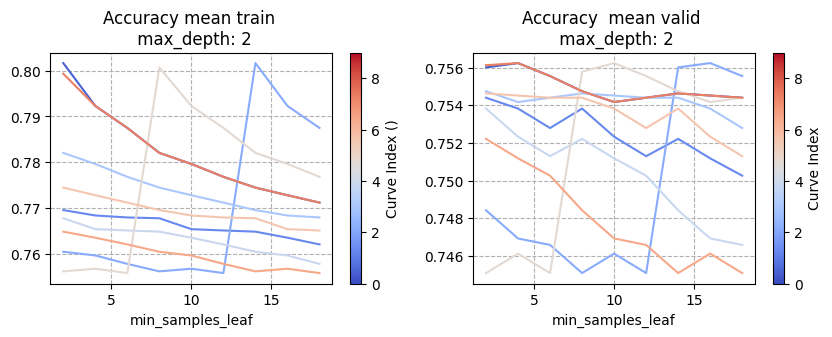

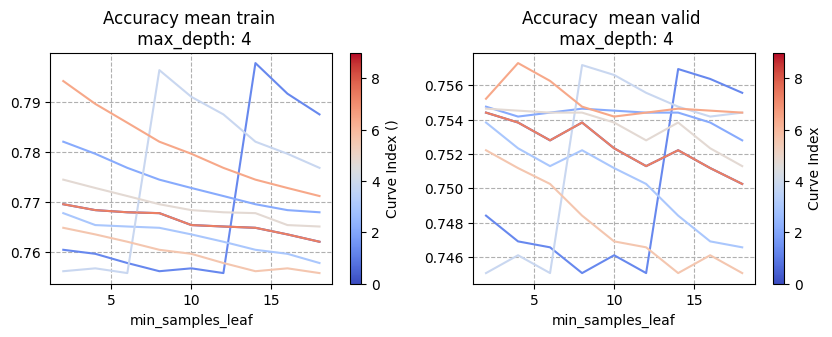

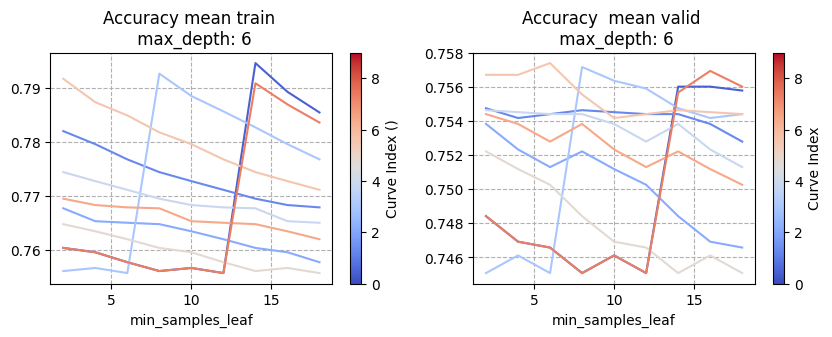

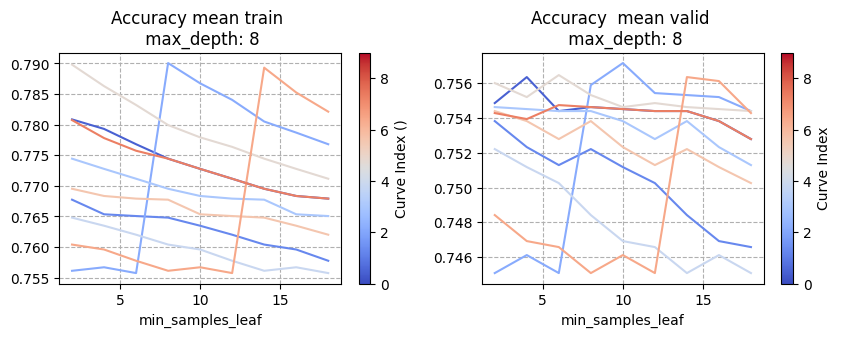

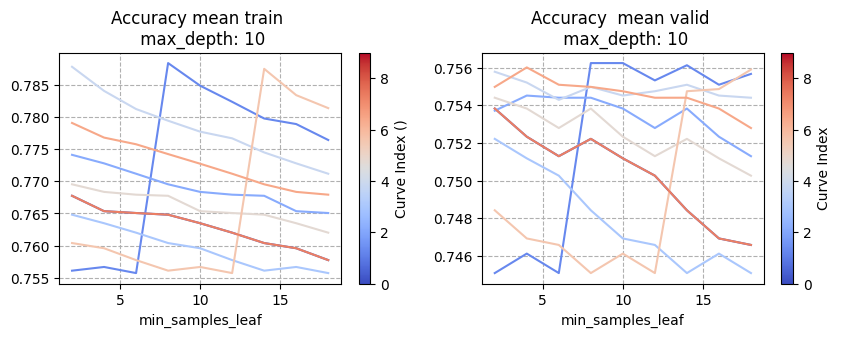

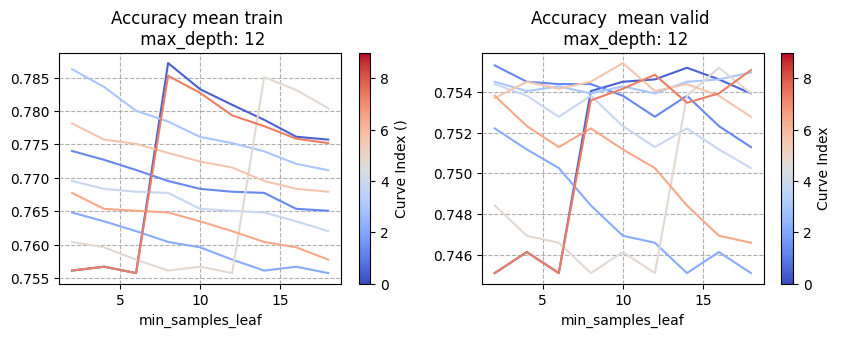

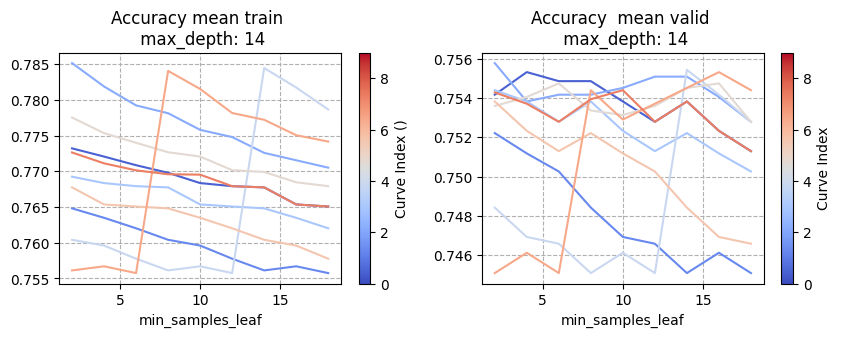

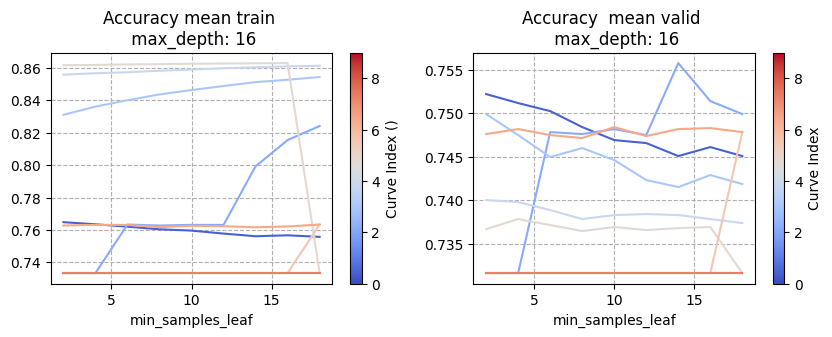

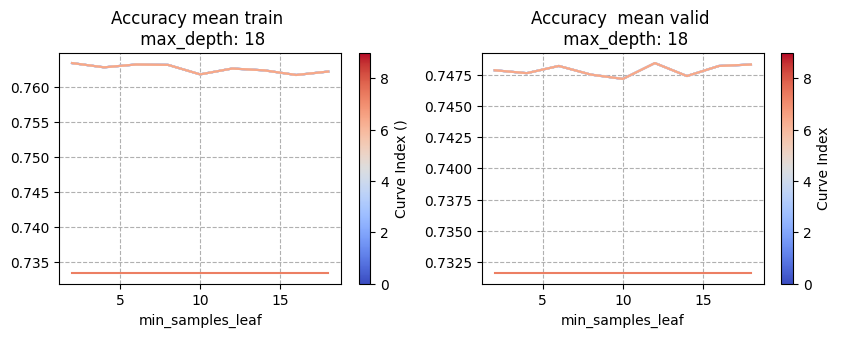

In [ ]:
name = range(2, 20, 2)
pallate = sns.color_palette("coolwarm", 20)
for  i in range(1, 10):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))

  reshaped_train = np.array(train_acc_means[(i-1)*9**2 : i*9**2]).reshape(9, -1)
  sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=9))

  for j in range(reshaped_train.shape[0]):
    ax[0].plot(range(2, 20, 2), reshaped_train[j], color=pallate[2*j])

  ax[0].grid(True, linestyle='--')
  ax[0].set_xlabel('min_samples_leaf')
  ax[0].set_title(f'Accuracy mean train \n max_depth: {name[i-1]}')

  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
  cbar.set_label("Curve Index ()")

  reshaped_valid = np.array(val_acc_means[(i-1)*9**2 : i*9**2]).reshape(9, -1)
  for j in range(reshaped_valid.shape[0]):  # Итерации строк
      ax[1].plot(range(2, 20, 2), reshaped_valid[j], color=pallate[2*j])  # Разные цвета

  ax[1].grid(True, linestyle='--')
  ax[1].set_xlabel('min_samples_leaf')
  ax[1].set_title(f'Accuracy  mean valid \n max_depth: {name[i-1]}')

  sm.set_array([])  # Пустая инициализация
  cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
  cbar.set_label("Curve Index")

  plt.show()

Видно что начиная с максимальной глубины (max_depth) 10 классификатор HistGradientBoostingClassifier начинает колебаться значение accuracy на валидационной выборке, что говорит о переобучении модели
Подходящие распредление метрики accuracy от min_samples leaf будут на max_depth от 2-8, так как на них кривые выглядят без каких либо существенных отклонений

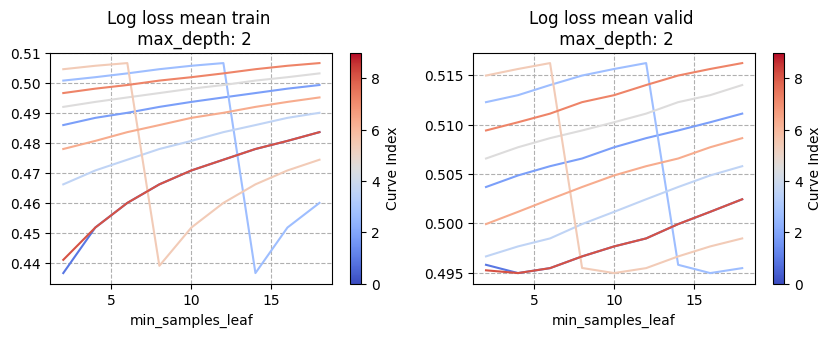

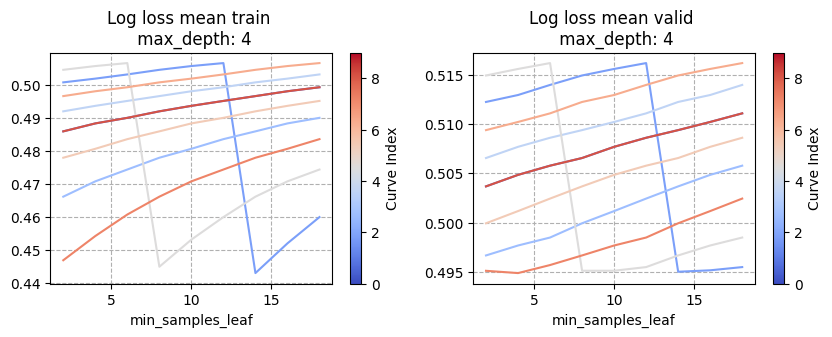

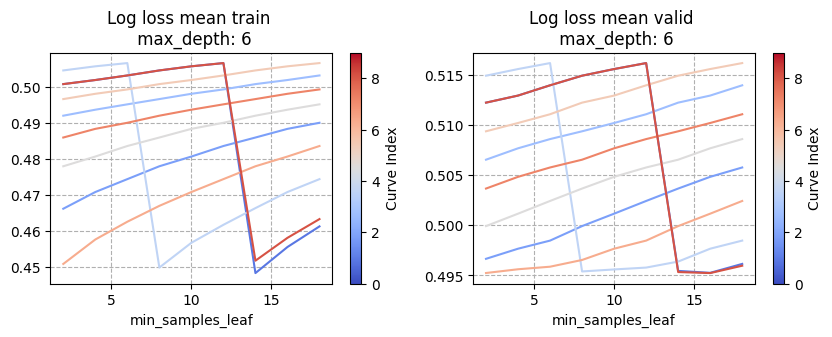

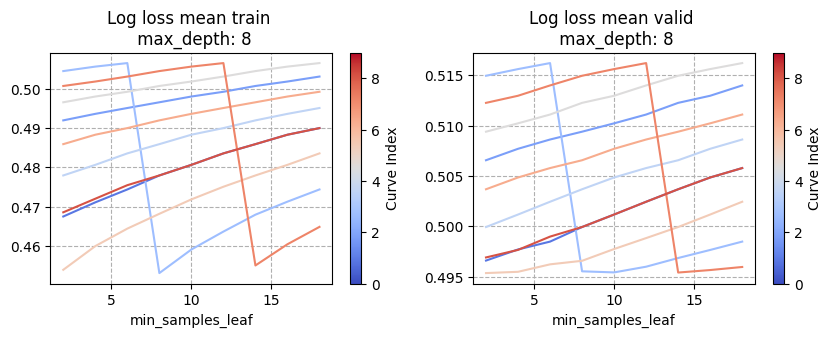

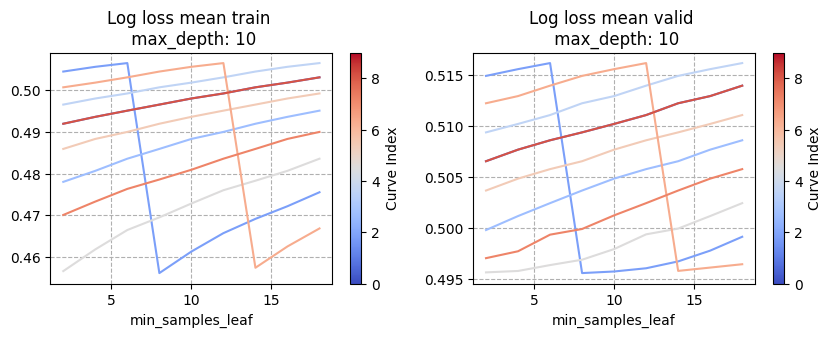

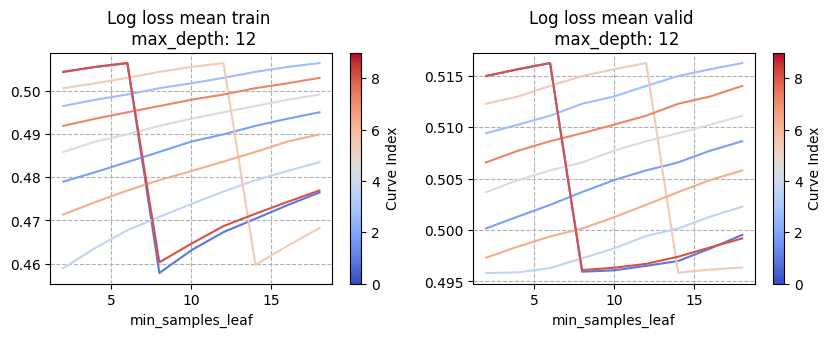

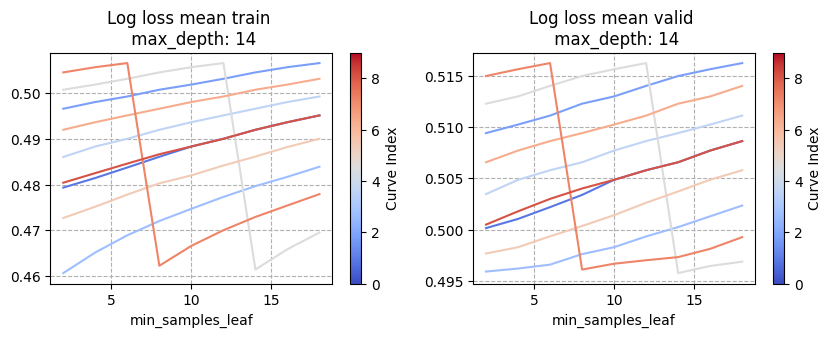

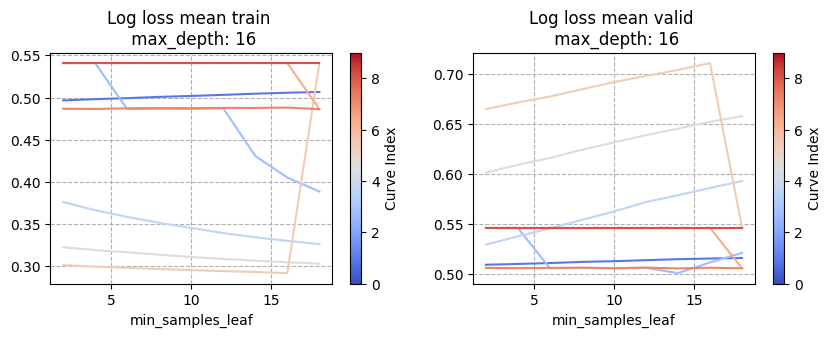

In [ ]:
name = range(2, 20, 2)
pallate = sns.color_palette("coolwarm", 9)
for  i in range(1, 9):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))

  reshaped_train = np.array(train_log_means[(i-1)*9**2 : i*9**2]).reshape(9, -1)
  sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=9))

  for j in range(reshaped_train.shape[0]):
      ax[0].plot(range(2, 20, 2), reshaped_train[j], color=pallate[j])
  ax[0].grid(True, linestyle='--')
  ax[0].set_xlabel('min_samples_leaf')
  ax[0].set_title(f'Log loss mean train \n max_depth: {name[i-1]}')
  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
  cbar.set_label("Curve Index")

  reshaped_valid = np.array(val_log_means[(i-1)*9**2 : i*9**2]).reshape(9, -1)
  for j in range(reshaped_valid.shape[0]):  # Итерации строк
      ax[1].plot(range(2, 20, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета
  ax[1].grid(True, linestyle='--')
  ax[1].set_xlabel('min_samples_leaf')
  ax[1].set_title(f'Log loss mean valid \n max_depth: {name[i-1]}')
  sm.set_array([])  # Пустая инициализация
  cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
  cbar.set_label("Curve Index")

  plt.show()

В свою очередь анализируя метрику logg loss видно, что хаотичность наблюдается только с максимальной глубины дерева 16, что не позволяет нам сделать дополнительное отсчение областей значений гиперпараметров на данной задачи классификации

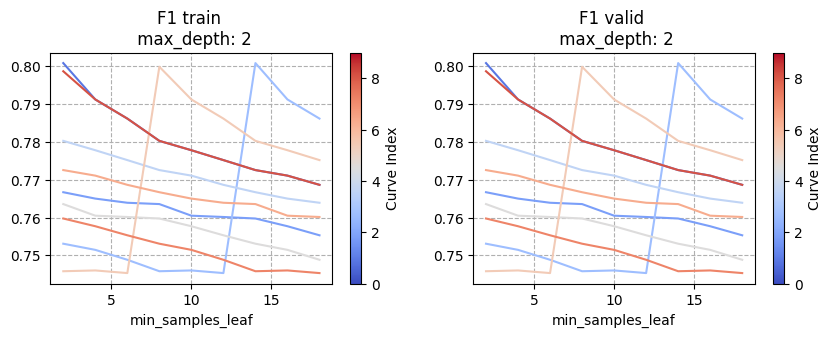

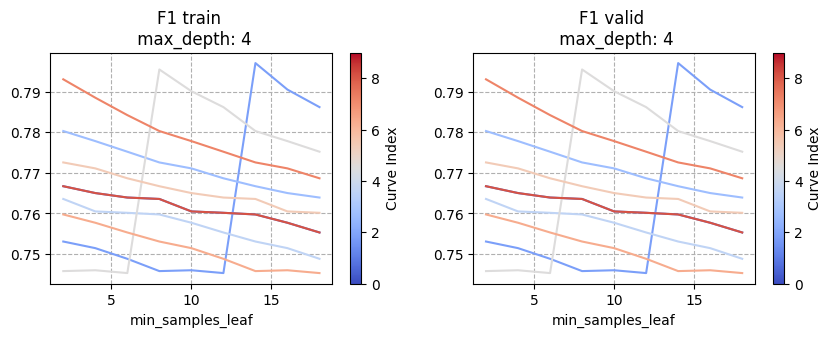

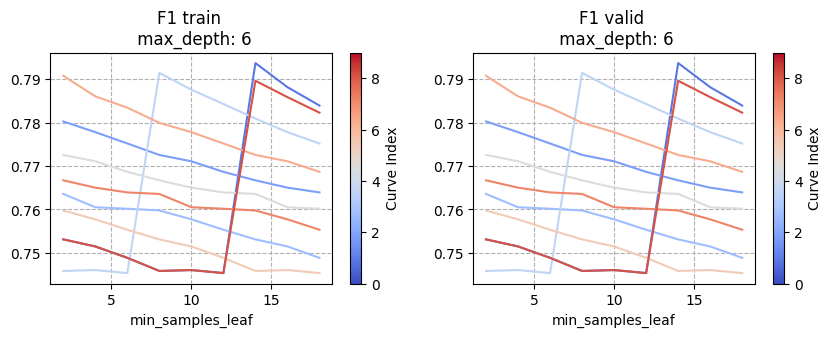

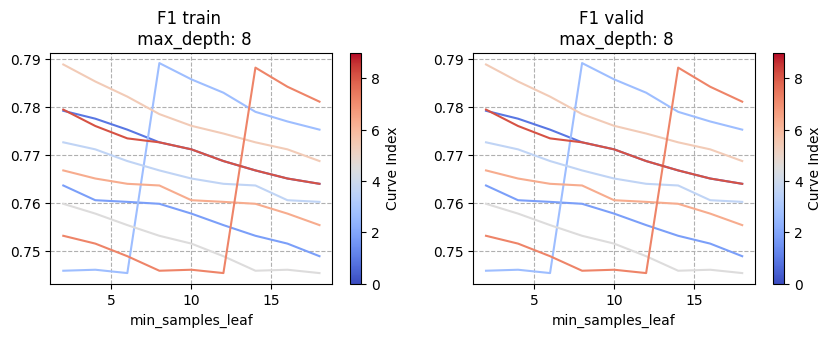

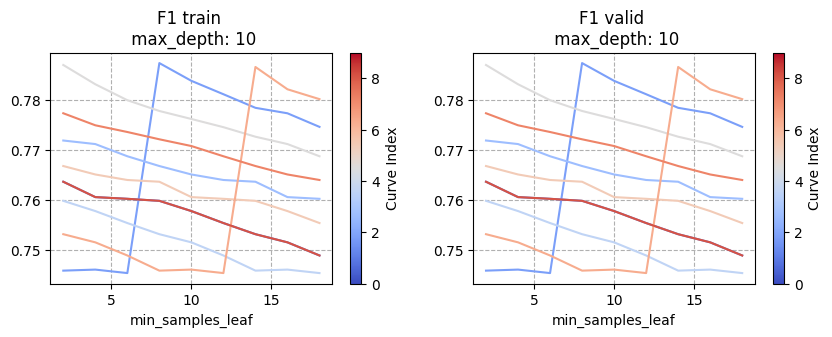

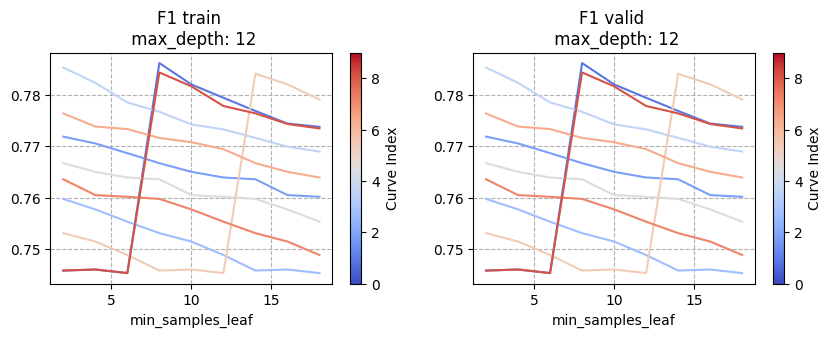

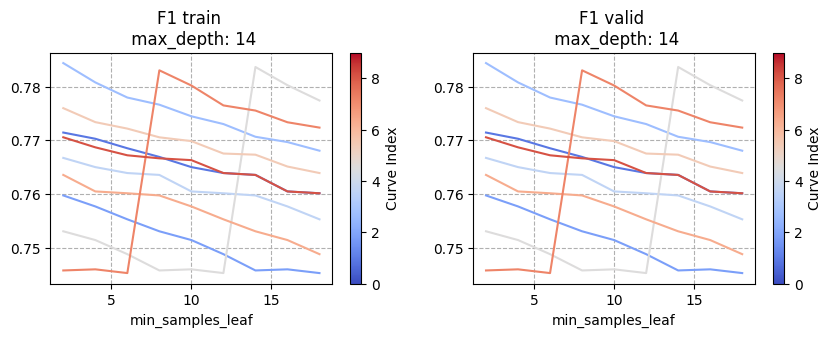

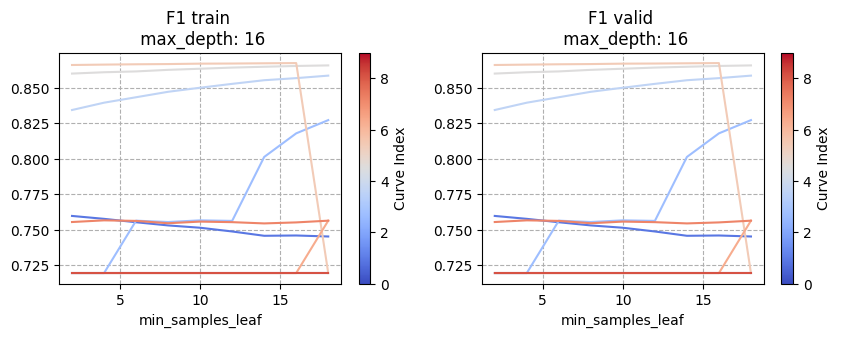

In [ ]:
name = range(2, 20, 2)
pallate = sns.color_palette("coolwarm", 9)
for  i in range(1, 9):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))

  reshaped_train = np.array(train_f1_mean[(i-1)*9**2 : i*9**2]).reshape(9, -1)
  sm = cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=9))

  for j in range(reshaped_train.shape[0]):
      ax[0].plot(range(2, 20, 2), reshaped_train[j], color=pallate[j])
  ax[0].grid(True, linestyle='--')
  ax[0].set_xlabel('min_samples_leaf')
  ax[0].set_title(f'F1 train \n max_depth: {name[i-1]}')
  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax[0], orientation='vertical')
  cbar.set_label("Curve Index")

  reshaped_valid = np.array(val_f1_mean[(i-1)*9**2 : i*9**2]).reshape(9, -1)
  for j in range(reshaped_valid.shape[0]):  # Итерации строк
      ax[1].plot(range(2, 20, 2), reshaped_valid[j], color=pallate[j])  # Разные цвета
  ax[1].grid(True, linestyle='--')
  ax[1].set_xlabel('min_samples_leaf')
  ax[1].set_title(f'F1 valid \n max_depth: {name[i-1]}')
  sm.set_array([])  # Пустая инициализация
  cbar = plt.colorbar(sm, ax=ax[1], orientation='vertical')
  cbar.set_label("Curve Index")

  plt.show()

Судя по зависимостям метрики F1 существенные отклеонения начинаются когда дерево глубокое (max_depth>=16) также наблюдается скачки для определлёенных кривых при каждом значении max_depth, что также характеризует переобучение на этих значениях, так как происходит нестабильное оценивание качества классификации
Определенная закономерность наблюдается между значениям при нестабльных условиях